In [1]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

### 데이터 판다스로 입력, 컬럼 정리

In [2]:
import pandas as pd
ch1 = pd.read_csv('../../../channel_1.dat', names=['Unix', 'Watt'],header=None, delimiter=" ")
print('Data File Import Done.')

Data File Import Done.


In [3]:
ch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Unix    int64
 1   Watt    int64
dtypes: int64(2)
memory usage: 333.2 MB


In [4]:
from datetime import datetime
ch1_dated = pd.DataFrame(ch1,columns = ['Unix', 'Date', 'Watt'])

ch1_dated['Date'] = pd.to_datetime(ch1['Unix'], unit='s')
ch1_dated.info()
ch1_dated.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Unix    int64         
 1   Date    datetime64[ns]
 2   Watt    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 499.8 MB


,Unix,Date,Watt
0,1352500095,2012-11-09 22:28:15,599
1,1352500101,2012-11-09 22:28:21,582
2,1352500107,2012-11-09 22:28:27,600
3,1352500113,2012-11-09 22:28:33,586
4,1352500120,2012-11-09 22:28:40,596
5,1352500132,2012-11-09 22:28:52,581
6,1352500138,2012-11-09 22:28:58,597
7,1352500144,2012-11-09 22:29:04,592
8,1352500150,2012-11-09 22:29:10,587
9,1352500156,2012-11-09 22:29:16,574


### 변수 및 구분 단계

### csv 파일 저장을 위한 폴더 생성

In [5]:
import os
try:
    os.mkdir('./New_Electirc_Data_CSV')
except FileExistsError:
    print('해당 폴더가 이미 존재합니다.\n폴더를 확인해주세요.')

해당 폴더가 이미 존재합니다.
폴더를 확인해주세요.


### 채택안

In [10]:
import csv
import time
import sys
month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

EMPTY_HOUR_LIST=[]
for _ in range(60):
    EMPTY_HOUR_LIST.append(0)
    
EMPTY_DAY_LIST=[]
for _ in range(1440):
    EMPTY_DAY_LIST.append(0)
#===============================================================================================================
def value (data, num):
    list0 = data.loc[num].values.tolist()
    date = list0[1]
    YYYY = date.year
    MM = date.month
    DD = date.day
    hh = date.hour
    mm = date.minute
    watt = list0[2]
    return YYYY, MM, DD, hh, mm, watt, date
#===============================================================================================================
print("해당 전력 데이터는 2012년 11월 10일부터 2017년 4월 25일까지 온전한 데이터가 존재합니다.\n")
time.sleep(0.5)
print("데이터는 사용자가 선택한 기간 중 1년 단위로 처리됩니다.\n")
time.sleep(0.5)
global TARGET_YEAR_START 
TARGET_YEAR_START = int(input("목표로 하는 처리 기간의 시작 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)
global TARGET_YEAR_END
TARGET_YEAR_END = int(input("목표로 하는 처리 기간의 종료 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)

if(TARGET_YEAR_START<2012 or TARGET_YEAR_START>2017 or TARGET_YEAR_END>2017 or  TARGET_YEAR_END<2012):
    print("\---기간을 잘못 설정했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

if(TARGET_YEAR_START==2012 or TARGET_YEAR_END==2017):
    print("\n---해당 기간은 현재 서비스하지 않습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

global HANDLE_MINUTE
HANDLE_MINUTE = int(input("데이터들은 기본적으로 1분 단위 최댓값으로 정리됩니다.\n추후 가공될 분 단위를 5분과 10분 중 골라 숫자만 입력해주세요. : \n"))
if(HANDLE_MINUTE!=5 and HANDLE_MINUTE!=10):
    print("\n---잘못된 시간 처리 단위를 선택했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

#TARGET_YEAR_START = 2013
#TARGET_YEAR_END=2013
#===============================================================================================================

i1=0
if TARGET_YEAR_START==2013:
    i1=431369
if TARGET_YEAR_START==2014:
    i1=5133240
if TARGET_YEAR_START==2015:
    i1=10179389
if TARGET_YEAR_START==2016:
    i1=15176099	

while(i1 < len(ch1_dated)):
    print("전체 과정 시작")
    YEAR0 = value(ch1_dated, i1)[0]

    if(YEAR0>=TARGET_YEAR_START and YEAR0<=TARGET_YEAR_END):
        print("<<<<<{0}년 데이터 시작 {1}>>>>>".format(YEAR0, value(ch1_dated, i1)[6]))
        MONTH0 = value(ch1_dated, i1)[1]
        
        REAL_DAY = 1
        ONE_MONTH_LIST=[]
        while(MONTH0<13):
            print("<<<<{0}월 데이터 시작 {1}>>>>".format(MONTH0, value(ch1_dated, i1)[6]), i1)
            MONTH1 = value(ch1_dated, i1)[1]
            DAY1= value(ch1_dated, i1)[2]
            
            if DAY1==REAL_DAY:
                while(REAL_DAY<=month[MONTH1]):
                    print("<<<{0}일 데이터 시작 {1}>>>".format(REAL_DAY, value(ch1_dated, i1)[6]), i1)
        
                    REAL_HOUR = 0
                    ONE_DAY_LIST=[]
                    while(REAL_HOUR<24):
                        print("<<{0}시 데이터 시작 {1}>>".format(REAL_HOUR, value(ch1_dated, i1)[6]), i1)
                        HOUR1 = value(ch1_dated, i1)[3]

                        REAL_MINUTE = 0
                        MIN_60_LIST=[]
                        if HOUR1==REAL_HOUR:
                            while(REAL_MINUTE<60):#특정 시간대 안에서 분단위 데이터를 60개 처리
                                MINUTE1 = value(ch1_dated, i1)[4]
                                HOUR2 = value(ch1_dated, i1)[3]

                                #print("<{0}분 데이터 시작 {1}>".format(REAL_MINUTE, value(ch1_dated, i1)[6]),i1)
                                SEC_60_LIST=[]

                                if MINUTE1==REAL_MINUTE and HOUR2==REAL_HOUR:
                                    while(True):#특정 분대 안에서 초단위 데이터를 처리
                                        MONTH2 = value(ch1_dated, i1)[1]
                                        DAY1 = value(ch1_dated, i1)[2] #여기 넣는게 맞나......??
                                        HOUR3 = value(ch1_dated, i1)[3]
                                        MINUTE2 = value(ch1_dated, i1)[4]
                                        SEC_60_LIST.append(value(ch1_dated, i1)[5])
                                        i1+=1

                                        if MINUTE1!=MINUTE2:
                                            if MINUTE2-MINUTE1==1 or MINUTE1-MINUTE2==59: #직후 분으로 넘어가거나 59분에서 다음 시로 넘어가는 경우
                                                #print("*{0}분의 값들 >> {1}\n".format(MINUTE1, SEC_60_LIST))
                                                i1-=1
                                                break

                                            else:#진행되다가 분대가 넘어가긴 했으나 다음 분으로 넘어가지 않고 점프해버린경우
                                                #print("*{0}분의 값들 >> {1} (결손 후 점프 시각 => {2})\n".format(MINUTE1, SEC_60_LIST, value(ch1_dated, i1)[6]))
                                                break

                                if MINUTE1!=REAL_MINUTE:#아예 해당분대가 결손된 경우
                                    if HOUR3==REAL_HOUR:
                                        #print("같은 시각대 내 분 결손")
                                        SEC_60_LIST.append(0)
                                        #print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                        
                                    if HOUR3!=REAL_HOUR:
                                        #print("결손 + 타 시각대 점프")
                                        for _ in range(60-len(MIN_60_LIST)):
                                            MIN_60_LIST.append(0)
                                            #print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                            REAL_MINUTE+=1
                                        break
                                
                                MIN_60_LIST.append(max(SEC_60_LIST))
                                REAL_MINUTE+=1

                        # 어떤 경우든 간에 시간이 바뀌는 경우, 정상이든 결손이든
                        if HOUR1!=REAL_HOUR:                
                            if DAY1==REAL_DAY:
                                #print("시각 불일치! 점프됨!")
                                for i in EMPTY_HOUR_LIST:
                                    ONE_DAY_LIST.append(i)
                                #print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(REAL_HOUR, "\n"*3))
                                
                            if DAY1!=REAL_DAY:
                                #print("시각 불일치! 점프됨!")
                                if REAL_HOUR==0:
                                    break

                                FAKE_HOUR=REAL_HOUR
                                for _ in range(23-REAL_HOUR+1):
                                    for i in EMPTY_HOUR_LIST:
                                        ONE_DAY_LIST.append(i)
                                    #print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(FAKE_HOUR, "\n"*3))
                                    FAKE_HOUR+=1
                                REAL_HOUR=23
                                

                        if REAL_MINUTE==60:
                            if len(MIN_60_LIST)==60:
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                
                            if len(MIN_60_LIST)<60:
                                for i in range(60-len(MIN_60_LIST)):
                                    MIN_60_LIST.append(0)
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                    
                            #print("*{0}시의 분별 최댓값 {1}개 >> {2}{3}".format(REAL_HOUR, len(MIN_60_LIST), MIN_60_LIST, "\n"*3))
                            
                        REAL_HOUR+=1

                    if REAL_HOUR==24:
                        if len(ONE_DAY_LIST)==1440:
                            for i in ONE_DAY_LIST:
                                    ONE_MONTH_LIST.append(i)
                        if len(ONE_DAY_LIST)<1440:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                        
                        print("*{0}일의 분별 최댓값 {1}개 추가됨.".format(REAL_DAY, len(ONE_DAY_LIST)))
                        print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))
                            
                    if DAY1!=REAL_DAY and REAL_HOUR!=24:
                        break
                    
                    REAL_DAY+=1
                    #print("Real Day 1 더해짐! 현재 정상일 => {0}{1}".format(REAL_DAY, "\n"*5))
                    
            if DAY1!=REAL_DAY:
                if MONTH2==MONTH1:
                    #for _ in range(DAY1-REAL_DAY-1):
                    for _ in range(1440-len(ONE_DAY_LIST)):
                        ONE_DAY_LIST.append(0)
                    for i in ONE_DAY_LIST:
                        ONE_MONTH_LIST.append(i)
                            
                    print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(1)".format(REAL_DAY, len(ONE_DAY_LIST)))
                    print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))
                    REAL_DAY+=1
                    
                if MONTH2!=MONTH1:
                    while(REAL_DAY<=month[MONTH1]):
                        #print("일자 불일치! 점프됨!")
                        #print(REAL_DAY, month[MONTH1])
                        if REAL_HOUR==0:
                            ONE_DAY_LIST=EMPTY_DAY_LIST
                            for i in EMPTY_DAY_LIST:
                                ONE_MONTH_LIST.append(i)

                        if REAL_HOUR!=0:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                                
                        print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(2)".format(REAL_DAY, len(ONE_DAY_LIST)))
                        print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))       
                        REAL_DAY+=1
                        
                    if REAL_DAY==month[MONTH1]+1:
                        break
            
            if MONTH1==2 and DAY1==29:
                i1=16010126
                break
                
        num=0
        try:
            for D in range(1, month[1]+1):
                if int(D)<10:
                    D=str(0)+str(D)
                for H in range(24):
                    if int(H)<10:
                        H=str(0)+str(H)
                    for M in range(60):
                        if int(M)<10:
                            M=str(0)+str(M)
                        SAVE_LIST=[]
                        SAVE_LIST.append(str(D))
                        SAVE_LIST.append(str(H))
                        SAVE_LIST.append(str(M))
                        SAVE_LIST.append(ONE_MONTH_LIST[num])

                        with open("./New_Electirc_Data_CSV/"+str(YEAR0)+'_'+str(MONTH0)+'_'+"House1_Ch1_Electric_Data_NEW.csv", 'a', newline='') as file:
                            writer = csv.writer(file)
                            writer.writerow(SAVE_LIST)
                        int(M)
                        num+=1

        except:
            pass
                    
        print("{0}월의 {1}일분 전체 데이터 {2}개 CSV 파일 저장 완료{3}".format(MONTH1, len(ONE_MONTH_LIST)//1440, len(ONE_MONTH_LIST), "\n"*10))
        print(i1)
        
    else:
        if value(ch1_dated, i1)[0]<TARGET_YEAR_START:
            i1+=1
        if value(ch1_dated, i1)[0]>TARGET_YEAR_END:
            print("End!")
            sys.exit()

해당 전력 데이터는 2012년 11월 10일부터 2017년 4월 25일까지 온전한 데이터가 존재합니다.

데이터는 사용자가 선택한 기간 중 1년 단위로 처리됩니다.

목표로 하는 처리 기간의 시작 연도를 4자리 숫자로 입력해주세요. : 
2016
목표로 하는 처리 기간의 종료 연도를 4자리 숫자로 입력해주세요. : 
2016
데이터들은 기본적으로 1분 단위 최댓값으로 정리됩니다.
추후 가공될 분 단위를 5분과 10분 중 골라 숫자만 입력해주세요. : 
5
전체 과정 시작
<<<<<2016년 데이터 시작 2016-01-01 00:00:10>>>>>
<<<<1월 데이터 시작 2016-01-01 00:00:10>>>> 15176099
<<<1일 데이터 시작 2016-01-01 00:00:10>>> 15176099
<<0시 데이터 시작 2016-01-01 00:00:10>> 15176099
<<1시 데이터 시작 2016-01-01 01:00:02>> 15176677
<<2시 데이터 시작 2016-01-01 02:00:01>> 15177261
<<3시 데이터 시작 2016-01-01 03:00:06>> 15177851
<<4시 데이터 시작 2016-01-01 04:00:03>> 15178437
<<5시 데이터 시작 2016-01-01 05:00:04>> 15179027
<<6시 데이터 시작 2016-01-01 06:00:04>> 15179618
<<7시 데이터 시작 2016-01-01 07:00:01>> 15180205
<<8시 데이터 시작 2016-01-01 08:00:00>> 15180796
<<9시 데이터 시작 2016-01-01 09:00:03>> 15181359
<<10시 데이터 시작 2016-01-01 10:00:01>> 15181935
<<11시 데이터 시작 2016-01-01 11:00:00>> 15182512
<<12시 데이터 시작 2016-01-01 12:00:11>> 15183097
<<13시 데이터 시작 2016-01-01 13:00:05>> 15

<<22시 데이터 시작 2016-01-07 22:00:05>> 15273010
<<23시 데이터 시작 2016-01-07 23:00:02>> 15273601
*7일의 분별 최댓값 1440개 추가됨.
10080개의 데이터 누적, 계산된 일자 => 7





<<<8일 데이터 시작 2016-01-08 00:00:03>>> 15274172
<<0시 데이터 시작 2016-01-08 00:00:03>> 15274172
<<1시 데이터 시작 2016-01-08 01:00:01>> 15274745
<<2시 데이터 시작 2016-01-08 02:00:05>> 15275337
<<3시 데이터 시작 2016-01-08 03:00:03>> 15275924
<<4시 데이터 시작 2016-01-08 04:00:03>> 15276513
<<5시 데이터 시작 2016-01-08 05:00:03>> 15277097
<<6시 데이터 시작 2016-01-08 06:00:01>> 15277682
<<7시 데이터 시작 2016-01-08 07:00:04>> 15278257
<<8시 데이터 시작 2016-01-08 08:00:04>> 15278819
<<9시 데이터 시작 2016-01-08 09:00:04>> 15279387
<<10시 데이터 시작 2016-01-08 10:00:04>> 15279959
<<11시 데이터 시작 2016-01-08 11:00:02>> 15280539
<<12시 데이터 시작 2016-01-08 12:00:03>> 15281105
<<13시 데이터 시작 2016-01-08 13:00:05>> 15281683
<<14시 데이터 시작 2016-01-08 14:00:04>> 15282260
<<15시 데이터 시작 2016-01-08 15:00:01>> 15282841
<<16시 데이터 시작 2016-01-08 16:00:01>> 15283421
<<17시 데이터 시작 2016-01-08 17:00:01>> 15284004
<<18시 데이터 시작 2016-01-08 18:00

<<1시 데이터 시작 2016-01-15 01:00:04>> 15371938
<<2시 데이터 시작 2016-01-15 02:00:01>> 15372513
<<3시 데이터 시작 2016-01-15 03:00:04>> 15373087
<<4시 데이터 시작 2016-01-15 04:00:03>> 15373664
<<5시 데이터 시작 2016-01-15 05:00:01>> 15374243
<<6시 데이터 시작 2016-01-15 06:00:05>> 15374817
<<7시 데이터 시작 2016-01-15 07:00:02>> 15375381
<<8시 데이터 시작 2016-01-15 08:00:00>> 15375936
<<9시 데이터 시작 2016-01-15 09:00:01>> 15376498
<<10시 데이터 시작 2016-01-15 10:00:05>> 15377047
<<11시 데이터 시작 2016-01-15 11:00:01>> 15377620
<<12시 데이터 시작 2016-01-15 12:00:01>> 15378182
<<13시 데이터 시작 2016-01-15 13:00:00>> 15378760
<<14시 데이터 시작 2016-01-15 14:00:03>> 15379337
<<15시 데이터 시작 2016-01-15 15:00:04>> 15379913
<<16시 데이터 시작 2016-01-15 16:00:00>> 15380491
<<17시 데이터 시작 2016-01-15 17:00:05>> 15381065
<<18시 데이터 시작 2016-01-15 18:00:12>> 15381640
<<19시 데이터 시작 2016-01-15 19:00:03>> 15382215
<<20시 데이터 시작 2016-01-15 20:00:02>> 15382793
<<21시 데이터 시작 2016-01-15 21:00:03>> 15383364
<<22시 데이터 시작 2016-01-15 22:00:00>> 15383941
<<23시 데이터 시작 2016-01-15 23:00:05>> 153845

<<5시 데이터 시작 2016-01-22 05:00:01>> 15470336
<<6시 데이터 시작 2016-01-22 06:00:05>> 15470914
<<7시 데이터 시작 2016-01-22 07:00:03>> 15471490
<<8시 데이터 시작 2016-01-22 08:00:05>> 15472051
<<9시 데이터 시작 2016-01-22 09:00:02>> 15472612
<<10시 데이터 시작 2016-01-22 10:00:00>> 15473187
<<11시 데이터 시작 2016-01-22 11:00:09>> 15473765
<<12시 데이터 시작 2016-01-22 12:00:01>> 15474331
<<13시 데이터 시작 2016-01-22 13:00:05>> 15474828
<<14시 데이터 시작 2016-01-22 14:00:00>> 15475379
<<15시 데이터 시작 2016-01-22 15:00:02>> 15475946
<<16시 데이터 시작 2016-01-22 16:00:03>> 15476530
<<17시 데이터 시작 2016-01-22 17:00:06>> 15477118
<<18시 데이터 시작 2016-01-22 18:00:02>> 15477703
<<19시 데이터 시작 2016-01-22 19:00:01>> 15478276
<<20시 데이터 시작 2016-01-22 20:00:03>> 15478854
<<21시 데이터 시작 2016-01-22 21:00:05>> 15479444
<<22시 데이터 시작 2016-01-22 22:00:01>> 15480029
<<23시 데이터 시작 2016-01-22 23:00:03>> 15480613
*22일의 분별 최댓값 1440개 추가됨.
31680개의 데이터 누적, 계산된 일자 => 22





<<<23일 데이터 시작 2016-01-23 00:00:03>>> 15481190
<<0시 데이터 시작 2016-01-23 00:00:03>> 15481190
<<1시 데이터 시작 2016-01-23

<<9시 데이터 시작 2016-01-29 09:00:02>> 15570285
<<10시 데이터 시작 2016-01-29 10:00:01>> 15570854
<<11시 데이터 시작 2016-01-29 11:00:02>> 15571445
<<12시 데이터 시작 2016-01-29 12:00:05>> 15572022
<<13시 데이터 시작 2016-01-29 13:00:04>> 15572588
<<14시 데이터 시작 2016-01-29 14:00:05>> 15573178
<<15시 데이터 시작 2016-01-29 15:00:02>> 15573766
<<16시 데이터 시작 2016-01-29 16:00:04>> 15574356
<<17시 데이터 시작 2016-01-29 17:00:02>> 15574944
<<18시 데이터 시작 2016-01-29 18:00:00>> 15575532
<<19시 데이터 시작 2016-01-29 19:00:04>> 15576113
<<20시 데이터 시작 2016-01-29 20:00:01>> 15576694
<<21시 데이터 시작 2016-01-29 21:00:06>> 15577284
<<22시 데이터 시작 2016-01-29 22:00:00>> 15577870
<<23시 데이터 시작 2016-01-29 23:00:04>> 15578456
*29일의 분별 최댓값 1440개 추가됨.
41760개의 데이터 누적, 계산된 일자 => 29





<<<30일 데이터 시작 2016-01-30 00:00:00>>> 15579042
<<0시 데이터 시작 2016-01-30 00:00:00>> 15579042
<<1시 데이터 시작 2016-01-30 01:00:05>> 15579629
<<2시 데이터 시작 2016-01-30 02:00:00>> 15580216
<<3시 데이터 시작 2016-01-30 03:00:01>> 15580805
<<4시 데이터 시작 2016-01-30 04:00:03>> 15581394
<<5시 데이터 시작 2016-01-30

<<10시 데이터 시작 2016-02-05 10:00:01>> 15668838
<<11시 데이터 시작 2016-02-05 11:00:02>> 15669425
<<12시 데이터 시작 2016-02-05 12:00:04>> 15670016
<<13시 데이터 시작 2016-02-05 13:00:00>> 15670601
<<14시 데이터 시작 2016-02-05 14:00:05>> 15671187
<<15시 데이터 시작 2016-02-05 15:00:05>> 15671776
<<16시 데이터 시작 2016-02-05 16:00:01>> 15672358
<<17시 데이터 시작 2016-02-05 17:00:00>> 15672941
<<18시 데이터 시작 2016-02-05 18:00:04>> 15673520
<<19시 데이터 시작 2016-02-05 19:00:01>> 15674093
<<20시 데이터 시작 2016-02-05 20:00:00>> 15674686
<<21시 데이터 시작 2016-02-05 21:00:02>> 15675276
<<22시 데이터 시작 2016-02-05 22:00:03>> 15675864
<<23시 데이터 시작 2016-02-05 23:00:05>> 15676450
*5일의 분별 최댓값 1440개 추가됨.
7200개의 데이터 누적, 계산된 일자 => 5





<<<6일 데이터 시작 2016-02-06 00:00:05>>> 15677042
<<0시 데이터 시작 2016-02-06 00:00:05>> 15677042
<<1시 데이터 시작 2016-02-06 01:00:03>> 15677632
<<2시 데이터 시작 2016-02-06 02:00:04>> 15678224
<<3시 데이터 시작 2016-02-06 03:00:00>> 15678810
<<4시 데이터 시작 2016-02-06 04:00:01>> 15679396
<<5시 데이터 시작 2016-02-06 05:00:03>> 15679985
<<6시 데이터 시작 2016-02-06 06:

<<14시 데이터 시작 2016-02-12 14:00:05>> 15768888
<<15시 데이터 시작 2016-02-12 15:00:04>> 15769466
<<16시 데이터 시작 2016-02-12 16:00:03>> 15770048
<<17시 데이터 시작 2016-02-12 17:00:04>> 15770624
<<18시 데이터 시작 2016-02-12 18:00:03>> 15771191
<<19시 데이터 시작 2016-02-12 19:00:00>> 15771734
<<20시 데이터 시작 2016-02-12 20:00:02>> 15772314
<<21시 데이터 시작 2016-02-12 21:00:05>> 15772893
<<22시 데이터 시작 2016-02-12 22:00:05>> 15773470
<<23시 데이터 시작 2016-02-12 23:00:00>> 15774053
*12일의 분별 최댓값 1440개 추가됨.
17280개의 데이터 누적, 계산된 일자 => 12





<<<13일 데이터 시작 2016-02-13 00:00:04>>> 15774634
<<0시 데이터 시작 2016-02-13 00:00:04>> 15774634
<<1시 데이터 시작 2016-02-13 01:00:00>> 15775212
<<2시 데이터 시작 2016-02-13 02:00:02>> 15775791
<<3시 데이터 시작 2016-02-13 03:00:04>> 15776372
<<4시 데이터 시작 2016-02-13 04:00:03>> 15776944
<<5시 데이터 시작 2016-02-13 05:00:05>> 15777516
<<6시 데이터 시작 2016-02-13 06:00:05>> 15778095
<<7시 데이터 시작 2016-02-13 07:00:06>> 15778666
<<8시 데이터 시작 2016-02-13 08:00:01>> 15779242
<<9시 데이터 시작 2016-02-13 09:00:03>> 15779820
<<10시 데이터 시작 2016-02-13 10

<<18시 데이터 시작 2016-02-19 18:00:01>> 15868234
<<19시 데이터 시작 2016-02-19 19:00:04>> 15868823
<<20시 데이터 시작 2016-02-19 20:00:04>> 15869412
<<21시 데이터 시작 2016-02-19 21:00:01>> 15869992
<<22시 데이터 시작 2016-02-19 22:00:01>> 15870582
<<23시 데이터 시작 2016-02-19 23:00:04>> 15871168
*19일의 분별 최댓값 1440개 추가됨.
27360개의 데이터 누적, 계산된 일자 => 19





<<<20일 데이터 시작 2016-02-20 00:00:05>>> 15871759
<<0시 데이터 시작 2016-02-20 00:00:05>> 15871759
<<1시 데이터 시작 2016-02-20 01:00:02>> 15872347
<<2시 데이터 시작 2016-02-20 02:00:05>> 15872936
<<3시 데이터 시작 2016-02-20 03:00:00>> 15873524
<<4시 데이터 시작 2016-02-20 04:00:03>> 15874115
<<5시 데이터 시작 2016-02-20 05:00:05>> 15874703
<<6시 데이터 시작 2016-02-20 06:00:02>> 15875293
<<7시 데이터 시작 2016-02-20 07:00:01>> 15875885
<<8시 데이터 시작 2016-02-20 08:00:04>> 15876476
<<9시 데이터 시작 2016-02-20 09:00:05>> 15877068
<<10시 데이터 시작 2016-02-20 10:00:03>> 15877657
<<11시 데이터 시작 2016-02-20 11:00:02>> 15878243
<<12시 데이터 시작 2016-02-20 12:00:05>> 15878833
<<13시 데이터 시작 2016-02-20 13:00:03>> 15879413
<<14시 데이터 시작 2016-02-20 14

<<22시 데이터 시작 2016-02-26 22:00:01>> 15967892
<<23시 데이터 시작 2016-02-26 23:00:06>> 15968461
*26일의 분별 최댓값 1440개 추가됨.
37440개의 데이터 누적, 계산된 일자 => 26





<<<27일 데이터 시작 2016-02-27 00:00:00>>> 15968957
<<0시 데이터 시작 2016-02-27 00:00:00>> 15968957
<<1시 데이터 시작 2016-02-27 01:00:03>> 15969532
<<2시 데이터 시작 2016-02-27 02:00:03>> 15970110
<<3시 데이터 시작 2016-02-27 03:00:05>> 15970684
<<4시 데이터 시작 2016-02-27 04:00:06>> 15971255
<<5시 데이터 시작 2016-02-27 05:00:05>> 15971834
<<6시 데이터 시작 2016-02-27 06:00:02>> 15972412
<<7시 데이터 시작 2016-02-27 07:00:02>> 15972984
<<8시 데이터 시작 2016-02-27 08:00:04>> 15973561
<<9시 데이터 시작 2016-02-27 09:00:00>> 15974125
<<10시 데이터 시작 2016-02-27 10:00:05>> 15974704
<<11시 데이터 시작 2016-02-27 11:00:04>> 15975280
<<12시 데이터 시작 2016-02-27 12:00:02>> 15975860
<<13시 데이터 시작 2016-02-27 13:00:00>> 15976436
<<14시 데이터 시작 2016-02-27 14:00:01>> 15977011
<<15시 데이터 시작 2016-02-27 15:00:00>> 15977584
<<16시 데이터 시작 2016-02-27 16:00:06>> 15978164
<<17시 데이터 시작 2016-02-27 17:00:03>> 15978734
<<18시 데이터 시작 2016-02-27 18

<<23시 데이터 시작 2016-03-05 23:00:00>> 16079137
*5일의 분별 최댓값 1440개 추가됨.
7200개의 데이터 누적, 계산된 일자 => 5





<<<6일 데이터 시작 2016-03-06 00:00:01>>> 16079722
<<0시 데이터 시작 2016-03-06 00:00:01>> 16079722
<<1시 데이터 시작 2016-03-06 01:00:01>> 16080307
<<2시 데이터 시작 2016-03-06 02:00:03>> 16080891
<<3시 데이터 시작 2016-03-06 03:00:00>> 16081472
<<4시 데이터 시작 2016-03-06 04:00:04>> 16082045
<<5시 데이터 시작 2016-03-06 05:00:03>> 16082620
<<6시 데이터 시작 2016-03-06 06:00:02>> 16083202
<<7시 데이터 시작 2016-03-06 07:00:00>> 16083779
<<8시 데이터 시작 2016-03-06 08:00:04>> 16084340
<<9시 데이터 시작 2016-03-06 09:00:06>> 16084905
<<10시 데이터 시작 2016-03-06 10:00:04>> 16085481
<<11시 데이터 시작 2016-03-06 11:00:00>> 16086057
<<12시 데이터 시작 2016-03-06 12:00:02>> 16086635
<<13시 데이터 시작 2016-03-06 13:00:04>> 16087198
<<14시 데이터 시작 2016-03-06 14:00:03>> 16087787
<<15시 데이터 시작 2016-03-06 15:00:04>> 16088369
<<16시 데이터 시작 2016-03-06 16:00:01>> 16088955
<<17시 데이터 시작 2016-03-06 17:00:02>> 16089545
<<18시 데이터 시작 2016-03-06 18:00:00>> 16090126
<<19시 데이터 시작 2016-03-06 19:00:

<<1시 데이터 시작 2016-03-13 01:00:02>> 16177375
<<2시 데이터 시작 2016-03-13 02:00:01>> 16177961
<<3시 데이터 시작 2016-03-13 03:00:04>> 16178544
<<4시 데이터 시작 2016-03-13 04:00:04>> 16179125
<<5시 데이터 시작 2016-03-13 05:00:04>> 16179707
<<6시 데이터 시작 2016-03-13 06:00:01>> 16180281
<<7시 데이터 시작 2016-03-13 07:00:01>> 16180858
<<8시 데이터 시작 2016-03-13 08:00:00>> 16181417
<<9시 데이터 시작 2016-03-13 09:00:08>> 16181985
<<10시 데이터 시작 2016-03-13 10:00:00>> 16182531
<<11시 데이터 시작 2016-03-13 11:00:05>> 16183096
<<12시 데이터 시작 2016-03-13 12:00:01>> 16183677
<<13시 데이터 시작 2016-03-13 13:00:04>> 16184217
<<14시 데이터 시작 2016-03-13 14:00:04>> 16184800
<<15시 데이터 시작 2016-03-13 15:00:05>> 16185389
<<16시 데이터 시작 2016-03-13 16:00:04>> 16185973
<<17시 데이터 시작 2016-03-13 17:00:02>> 16186557
<<18시 데이터 시작 2016-03-13 18:00:03>> 16187143
<<19시 데이터 시작 2016-03-13 19:00:00>> 16187731
<<20시 데이터 시작 2016-03-13 20:00:04>> 16188303
<<21시 데이터 시작 2016-03-13 21:00:00>> 16188884
<<22시 데이터 시작 2016-03-13 22:00:02>> 16189467
<<23시 데이터 시작 2016-03-13 23:00:04>> 161900

<<5시 데이터 시작 2016-03-20 05:00:00>> 16276699
<<6시 데이터 시작 2016-03-20 06:00:05>> 16277277
<<7시 데이터 시작 2016-03-20 07:00:00>> 16277855
<<8시 데이터 시작 2016-03-20 08:00:02>> 16278436
<<9시 데이터 시작 2016-03-20 09:00:03>> 16278980
<<10시 데이터 시작 2016-03-20 10:00:05>> 16279557
<<11시 데이터 시작 2016-03-20 11:00:03>> 16280122
<<12시 데이터 시작 2016-03-20 12:00:11>> 16280699
<<13시 데이터 시작 2016-03-20 13:00:01>> 16281271
<<14시 데이터 시작 2016-03-20 14:00:01>> 16281850
<<15시 데이터 시작 2016-03-20 15:00:00>> 16282429
<<16시 데이터 시작 2016-03-20 16:00:03>> 16283007
<<17시 데이터 시작 2016-03-20 17:00:00>> 16283577
<<18시 데이터 시작 2016-03-20 18:00:05>> 16284146
<<19시 데이터 시작 2016-03-20 19:00:00>> 16284715
<<20시 데이터 시작 2016-03-20 20:00:03>> 16285291
<<21시 데이터 시작 2016-03-20 21:00:01>> 16285872
<<22시 데이터 시작 2016-03-20 22:00:03>> 16286453
<<23시 데이터 시작 2016-03-20 23:00:03>> 16287040
*20일의 분별 최댓값 1440개 추가됨.
28800개의 데이터 누적, 계산된 일자 => 20





<<<21일 데이터 시작 2016-03-21 00:00:03>>> 16287617
<<0시 데이터 시작 2016-03-21 00:00:03>> 16287617
<<1시 데이터 시작 2016-03-21

<<9시 데이터 시작 2016-03-27 09:00:02>> 16376642
<<10시 데이터 시작 2016-03-27 10:00:00>> 16377219
<<11시 데이터 시작 2016-03-27 11:00:01>> 16377797
<<12시 데이터 시작 2016-03-27 12:00:00>> 16378376
<<13시 데이터 시작 2016-03-27 13:00:03>> 16378950
<<14시 데이터 시작 2016-03-27 14:00:02>> 16379523
<<15시 데이터 시작 2016-03-27 15:00:02>> 16380089
<<16시 데이터 시작 2016-03-27 16:00:01>> 16380667
<<17시 데이터 시작 2016-03-27 17:00:01>> 16381245
<<18시 데이터 시작 2016-03-27 18:00:00>> 16381815
<<19시 데이터 시작 2016-03-27 19:00:03>> 16382389
<<20시 데이터 시작 2016-03-27 20:00:04>> 16382966
<<21시 데이터 시작 2016-03-27 21:00:00>> 16383542
<<22시 데이터 시작 2016-03-27 22:00:05>> 16384118
<<23시 데이터 시작 2016-03-27 23:00:03>> 16384698
*27일의 분별 최댓값 1440개 추가됨.
38880개의 데이터 누적, 계산된 일자 => 27





<<<28일 데이터 시작 2016-03-28 00:00:01>>> 16385272
<<0시 데이터 시작 2016-03-28 00:00:01>> 16385272
<<1시 데이터 시작 2016-03-28 01:00:01>> 16385850
<<2시 데이터 시작 2016-03-28 02:00:04>> 16386425
<<3시 데이터 시작 2016-03-28 03:00:02>> 16387001
<<4시 데이터 시작 2016-03-28 04:00:03>> 16387572
<<5시 데이터 시작 2016-03-28

<<9시 데이터 시작 2016-04-03 09:00:00>> 16474171
<<10시 데이터 시작 2016-04-03 10:00:03>> 16474758
<<11시 데이터 시작 2016-04-03 11:00:05>> 16475346
<<12시 데이터 시작 2016-04-03 12:00:06>> 16475924
<<13시 데이터 시작 2016-04-03 13:00:00>> 16476516
<<14시 데이터 시작 2016-04-03 14:00:03>> 16477098
<<15시 데이터 시작 2016-04-03 15:00:02>> 16477685
<<16시 데이터 시작 2016-04-03 16:00:03>> 16478271
<<17시 데이터 시작 2016-04-03 17:00:00>> 16478837
<<18시 데이터 시작 2016-04-03 18:00:03>> 16479415
<<19시 데이터 시작 2016-04-03 19:00:00>> 16479989
<<20시 데이터 시작 2016-04-03 20:00:01>> 16480572
<<21시 데이터 시작 2016-04-03 21:00:02>> 16481148
<<22시 데이터 시작 2016-04-03 22:00:04>> 16481734
<<23시 데이터 시작 2016-04-03 23:00:02>> 16482318
*3일의 분별 최댓값 1440개 추가됨.
4320개의 데이터 누적, 계산된 일자 => 3





<<<4일 데이터 시작 2016-04-04 00:00:02>>> 16482899
<<0시 데이터 시작 2016-04-04 00:00:02>> 16482899
<<1시 데이터 시작 2016-04-04 01:00:04>> 16483489
<<2시 데이터 시작 2016-04-04 02:00:06>> 16484074
<<3시 데이터 시작 2016-04-04 03:00:02>> 16484664
<<4시 데이터 시작 2016-04-04 04:00:04>> 16485256
<<5시 데이터 시작 2016-04-04 05:

<<13시 데이터 시작 2016-04-10 13:00:04>> 16573814
<<14시 데이터 시작 2016-04-10 14:00:05>> 16574405
<<15시 데이터 시작 2016-04-10 15:00:04>> 16574996
<<16시 데이터 시작 2016-04-10 16:00:02>> 16575582
<<17시 데이터 시작 2016-04-10 17:00:03>> 16576174
<<18시 데이터 시작 2016-04-10 18:00:00>> 16576752
<<19시 데이터 시작 2016-04-10 19:00:02>> 16577322
<<20시 데이터 시작 2016-04-10 20:00:05>> 16577908
<<21시 데이터 시작 2016-04-10 21:00:01>> 16578492
<<22시 데이터 시작 2016-04-10 22:00:01>> 16579081
<<23시 데이터 시작 2016-04-10 23:00:04>> 16579672
*10일의 분별 최댓값 1440개 추가됨.
14400개의 데이터 누적, 계산된 일자 => 10





<<<11일 데이터 시작 2016-04-11 00:00:00>>> 16580260
<<0시 데이터 시작 2016-04-11 00:00:00>> 16580260
<<1시 데이터 시작 2016-04-11 01:00:00>> 16580841
<<2시 데이터 시작 2016-04-11 02:00:03>> 16581429
<<3시 데이터 시작 2016-04-11 03:00:03>> 16582018
<<4시 데이터 시작 2016-04-11 04:00:02>> 16582605
<<5시 데이터 시작 2016-04-11 05:00:03>> 16583188
<<6시 데이터 시작 2016-04-11 06:00:05>> 16583772
<<7시 데이터 시작 2016-04-11 07:00:05>> 16584328
<<8시 데이터 시작 2016-04-11 08:00:00>> 16584887
<<9시 데이터 시작 2016-04-11 09

<<17시 데이터 시작 2016-04-17 17:00:02>> 16674299
<<18시 데이터 시작 2016-04-17 18:00:03>> 16674889
<<19시 데이터 시작 2016-04-17 19:00:04>> 16675475
<<20시 데이터 시작 2016-04-17 20:00:04>> 16676057
<<21시 데이터 시작 2016-04-17 21:00:01>> 16676644
<<22시 데이터 시작 2016-04-17 22:00:06>> 16677228
<<23시 데이터 시작 2016-04-17 23:00:05>> 16677812
*17일의 분별 최댓값 1440개 추가됨.
24480개의 데이터 누적, 계산된 일자 => 17





<<<18일 데이터 시작 2016-04-18 00:00:05>>> 16678392
<<0시 데이터 시작 2016-04-18 00:00:05>> 16678392
<<1시 데이터 시작 2016-04-18 01:00:01>> 16678967
<<2시 데이터 시작 2016-04-18 02:00:04>> 16679543
<<3시 데이터 시작 2016-04-18 03:00:00>> 16680116
<<4시 데이터 시작 2016-04-18 04:00:04>> 16680690
<<5시 데이터 시작 2016-04-18 05:00:00>> 16681266
<<6시 데이터 시작 2016-04-18 06:00:00>> 16681841
<<7시 데이터 시작 2016-04-18 07:00:04>> 16682409
<<8시 데이터 시작 2016-04-18 08:00:03>> 16682948
<<9시 데이터 시작 2016-04-18 09:00:03>> 16683519
<<10시 데이터 시작 2016-04-18 10:00:03>> 16684093
<<11시 데이터 시작 2016-04-18 11:00:00>> 16684679
<<12시 데이터 시작 2016-04-18 12:00:03>> 16685271
<<13시 데이터 시작 2016-04-18 13

<<21시 데이터 시작 2016-04-24 21:00:02>> 16773919
<<22시 데이터 시작 2016-04-24 22:00:00>> 16774489
<<23시 데이터 시작 2016-04-24 23:00:04>> 16775062
*24일의 분별 최댓값 1440개 추가됨.
34560개의 데이터 누적, 계산된 일자 => 24





<<<25일 데이터 시작 2016-04-25 00:00:01>>> 16775644
<<0시 데이터 시작 2016-04-25 00:00:01>> 16775644
<<1시 데이터 시작 2016-04-25 01:00:04>> 16776233
<<2시 데이터 시작 2016-04-25 02:00:03>> 16776815
<<3시 데이터 시작 2016-04-25 03:00:01>> 16777393
<<4시 데이터 시작 2016-04-25 04:00:01>> 16777975
<<5시 데이터 시작 2016-04-25 05:00:05>> 16778559
<<6시 데이터 시작 2016-04-25 06:00:02>> 16779141
<<7시 데이터 시작 2016-04-25 07:00:05>> 16779702
<<8시 데이터 시작 2016-04-25 08:00:01>> 16780265
<<9시 데이터 시작 2016-04-25 09:00:01>> 16780843
<<10시 데이터 시작 2016-04-25 10:00:05>> 16781431
<<11시 데이터 시작 2016-04-25 11:00:03>> 16782016
<<12시 데이터 시작 2016-04-25 12:00:03>> 16782598
<<13시 데이터 시작 2016-04-25 13:00:00>> 16783185
<<14시 데이터 시작 2016-04-25 14:00:01>> 16783763
<<15시 데이터 시작 2016-04-25 15:00:05>> 16784354
<<16시 데이터 시작 2016-04-25 16:00:04>> 16784938
<<17시 데이터 시작 2016-04-25 17

<<21시 데이터 시작 2016-05-01 21:00:05>> 16871395
<<22시 데이터 시작 2016-05-01 22:00:00>> 16871984
<<23시 데이터 시작 2016-05-01 23:00:04>> 16872571
*1일의 분별 최댓값 1440개 추가됨.
1440개의 데이터 누적, 계산된 일자 => 1





<<<2일 데이터 시작 2016-05-02 00:00:02>>> 16873156
<<0시 데이터 시작 2016-05-02 00:00:02>> 16873156
<<1시 데이터 시작 2016-05-02 01:00:00>> 16873742
<<2시 데이터 시작 2016-05-02 02:00:00>> 16874327
<<3시 데이터 시작 2016-05-02 03:00:04>> 16874915
<<4시 데이터 시작 2016-05-02 04:00:05>> 16875503
<<5시 데이터 시작 2016-05-02 05:00:00>> 16876092
<<6시 데이터 시작 2016-05-02 06:00:04>> 16876680
<<7시 데이터 시작 2016-05-02 07:00:04>> 16877269
<<8시 데이터 시작 2016-05-02 08:00:03>> 16877853
<<9시 데이터 시작 2016-05-02 09:00:04>> 16878422
<<10시 데이터 시작 2016-05-02 10:00:04>> 16879013
<<11시 데이터 시작 2016-05-02 11:00:04>> 16879564
<<12시 데이터 시작 2016-05-02 12:00:00>> 16880146
<<13시 데이터 시작 2016-05-02 13:00:00>> 16880732
<<14시 데이터 시작 2016-05-02 14:00:01>> 16881324
<<15시 데이터 시작 2016-05-02 15:00:04>> 16881911
<<16시 데이터 시작 2016-05-02 16:00:04>> 16882484
<<17시 데이터 시작 2016-05-02 17:00:

<<1시 데이터 시작 2016-05-09 01:00:05>> 16971624
<<2시 데이터 시작 2016-05-09 02:00:02>> 16972212
<<3시 데이터 시작 2016-05-09 03:00:05>> 16972804
<<4시 데이터 시작 2016-05-09 04:00:04>> 16973395
<<5시 데이터 시작 2016-05-09 05:00:04>> 16973985
<<6시 데이터 시작 2016-05-09 06:00:00>> 16974575
<<7시 데이터 시작 2016-05-09 07:00:03>> 16975155
<<8시 데이터 시작 2016-05-09 08:00:04>> 16975735
<<9시 데이터 시작 2016-05-09 09:00:05>> 16976324
<<10시 데이터 시작 2016-05-09 10:00:01>> 16976913
<<11시 데이터 시작 2016-05-09 11:00:01>> 16977505
<<12시 데이터 시작 2016-05-09 12:00:03>> 16978098
<<13시 데이터 시작 2016-05-09 13:00:04>> 16978690
<<14시 데이터 시작 2016-05-09 14:00:02>> 16979283
<<15시 데이터 시작 2016-05-09 15:00:00>> 16979874
<<16시 데이터 시작 2016-05-09 16:00:04>> 16980460
<<17시 데이터 시작 2016-05-09 17:00:02>> 16981053
<<18시 데이터 시작 2016-05-09 18:00:02>> 16981636
<<19시 데이터 시작 2016-05-09 19:00:01>> 16982212
<<20시 데이터 시작 2016-05-09 20:00:01>> 16982798
<<21시 데이터 시작 2016-05-09 21:00:04>> 16983391
<<22시 데이터 시작 2016-05-09 22:00:01>> 16983983
<<23시 데이터 시작 2016-05-09 23:00:05>> 169845

<<5시 데이터 시작 2016-05-16 05:00:00>> 17072294
<<6시 데이터 시작 2016-05-16 06:00:03>> 17072881
<<7시 데이터 시작 2016-05-16 07:00:09>> 17073459
<<8시 데이터 시작 2016-05-16 08:00:04>> 17074035
<<9시 데이터 시작 2016-05-16 09:00:02>> 17074623
<<10시 데이터 시작 2016-05-16 10:00:04>> 17075212
<<11시 데이터 시작 2016-05-16 11:00:01>> 17075796
<<12시 데이터 시작 2016-05-16 12:00:05>> 17076381
<<13시 데이터 시작 2016-05-16 13:00:02>> 17076968
<<14시 데이터 시작 2016-05-16 14:00:03>> 17077558
<<15시 데이터 시작 2016-05-16 15:00:05>> 17078145
<<16시 데이터 시작 2016-05-16 16:00:00>> 17078732
<<17시 데이터 시작 2016-05-16 17:00:15>> 17079318
<<18시 데이터 시작 2016-05-16 18:00:03>> 17079896
<<19시 데이터 시작 2016-05-16 19:00:03>> 17080480
<<20시 데이터 시작 2016-05-16 20:00:05>> 17081069
<<21시 데이터 시작 2016-05-16 21:00:00>> 17081645
<<22시 데이터 시작 2016-05-16 22:00:03>> 17082233
<<23시 데이터 시작 2016-05-16 23:00:00>> 17082809
*16일의 분별 최댓값 1440개 추가됨.
23040개의 데이터 누적, 계산된 일자 => 16





<<<17일 데이터 시작 2016-05-17 00:00:02>>> 17083401
<<0시 데이터 시작 2016-05-17 00:00:02>> 17083401
<<1시 데이터 시작 2016-05-17

<<9시 데이터 시작 2016-05-23 09:00:01>> 17172651
<<10시 데이터 시작 2016-05-23 10:00:03>> 17173232
<<11시 데이터 시작 2016-05-23 11:00:02>> 17173815
<<12시 데이터 시작 2016-05-23 12:00:01>> 17174399
<<13시 데이터 시작 2016-05-23 13:00:03>> 17174983
<<14시 데이터 시작 2016-05-23 14:00:03>> 17175562
<<15시 데이터 시작 2016-05-23 15:00:02>> 17176148
<<16시 데이터 시작 2016-05-23 16:00:04>> 17176734
<<17시 데이터 시작 2016-05-23 17:00:00>> 17177309
<<18시 데이터 시작 2016-05-23 18:00:04>> 17177890
<<19시 데이터 시작 2016-05-23 19:00:04>> 17178470
<<20시 데이터 시작 2016-05-23 20:00:03>> 17179061
<<21시 데이터 시작 2016-05-23 21:00:00>> 17179633
<<22시 데이터 시작 2016-05-23 22:00:01>> 17180202
<<23시 데이터 시작 2016-05-23 23:00:05>> 17180794
*23일의 분별 최댓값 1440개 추가됨.
33120개의 데이터 누적, 계산된 일자 => 23





<<<24일 데이터 시작 2016-05-24 00:00:01>>> 17181378
<<0시 데이터 시작 2016-05-24 00:00:01>> 17181378
<<1시 데이터 시작 2016-05-24 01:00:04>> 17181963
<<2시 데이터 시작 2016-05-24 02:00:00>> 17182553
<<3시 데이터 시작 2016-05-24 03:00:02>> 17183145
<<4시 데이터 시작 2016-05-24 04:00:00>> 17183733
<<5시 데이터 시작 2016-05-24

<<13시 데이터 시작 2016-05-30 13:00:01>> 17273389
<<14시 데이터 시작 2016-05-30 14:00:02>> 17273970
<<15시 데이터 시작 2016-05-30 15:00:03>> 17274558
<<16시 데이터 시작 2016-05-30 16:00:01>> 17275149
<<17시 데이터 시작 2016-05-30 17:00:00>> 17275738
<<18시 데이터 시작 2016-05-30 18:00:02>> 17276329
<<19시 데이터 시작 2016-05-30 19:00:05>> 17276917
<<20시 데이터 시작 2016-05-30 20:00:03>> 17277505
<<21시 데이터 시작 2016-05-30 21:00:01>> 17278093
<<22시 데이터 시작 2016-05-30 22:00:03>> 17278678
<<23시 데이터 시작 2016-05-30 23:00:10>> 17279266
*30일의 분별 최댓값 1440개 추가됨.
43200개의 데이터 누적, 계산된 일자 => 30





<<<31일 데이터 시작 2016-05-31 00:00:01>>> 17279854
<<0시 데이터 시작 2016-05-31 00:00:01>> 17279854
<<1시 데이터 시작 2016-05-31 01:00:04>> 17280441
<<2시 데이터 시작 2016-05-31 02:00:05>> 17281025
<<3시 데이터 시작 2016-05-31 03:00:02>> 17281607
<<4시 데이터 시작 2016-05-31 04:00:01>> 17282198
<<5시 데이터 시작 2016-05-31 05:00:01>> 17282785
<<6시 데이터 시작 2016-05-31 06:00:04>> 17283366
<<7시 데이터 시작 2016-05-31 07:00:03>> 17283953
<<8시 데이터 시작 2016-05-31 08:00:03>> 17284540
<<9시 데이터 시작 2016-05-31 09

<<14시 데이터 시작 2016-06-06 14:00:01>> 17371505
<<15시 데이터 시작 2016-06-06 15:00:02>> 17372090
<<16시 데이터 시작 2016-06-06 16:00:05>> 17372675
<<17시 데이터 시작 2016-06-06 17:00:04>> 17373251
<<18시 데이터 시작 2016-06-06 18:00:02>> 17373833
<<19시 데이터 시작 2016-06-06 19:00:05>> 17374415
<<20시 데이터 시작 2016-06-06 20:00:02>> 17374997
<<21시 데이터 시작 2016-06-06 21:00:00>> 17375574
<<22시 데이터 시작 2016-06-06 22:00:04>> 17376141
<<23시 데이터 시작 2016-06-06 23:00:05>> 17376702
*6일의 분별 최댓값 1440개 추가됨.
8640개의 데이터 누적, 계산된 일자 => 6





<<<7일 데이터 시작 2016-06-07 00:00:00>>> 17377282
<<0시 데이터 시작 2016-06-07 00:00:00>> 17377282
<<1시 데이터 시작 2016-06-07 01:00:05>> 17377865
<<2시 데이터 시작 2016-06-07 02:00:03>> 17378451
<<3시 데이터 시작 2016-06-07 03:00:00>> 17379035
<<4시 데이터 시작 2016-06-07 04:00:00>> 17379616
<<5시 데이터 시작 2016-06-07 05:00:05>> 17380191
<<6시 데이터 시작 2016-06-07 06:00:03>> 17380773
<<7시 데이터 시작 2016-06-07 07:00:00>> 17381333
<<8시 데이터 시작 2016-06-07 08:00:03>> 17381916
<<9시 데이터 시작 2016-06-07 09:00:05>> 17382488
<<10시 데이터 시작 2016-06-07 10:00:

<<18시 데이터 시작 2016-06-13 18:00:04>> 17471872
<<19시 데이터 시작 2016-06-13 19:00:03>> 17472458
<<20시 데이터 시작 2016-06-13 20:00:01>> 17473021
<<21시 데이터 시작 2016-06-13 21:00:05>> 17473606
<<22시 데이터 시작 2016-06-13 22:00:02>> 17474194
<<23시 데이터 시작 2016-06-13 23:00:00>> 17474781
*13일의 분별 최댓값 1440개 추가됨.
18720개의 데이터 누적, 계산된 일자 => 13





<<<14일 데이터 시작 2016-06-14 00:00:03>>> 17475366
<<0시 데이터 시작 2016-06-14 00:00:03>> 17475366
<<1시 데이터 시작 2016-06-14 01:00:05>> 17475955
<<2시 데이터 시작 2016-06-14 02:00:02>> 17476537
<<3시 데이터 시작 2016-06-14 03:00:05>> 17477113
<<4시 데이터 시작 2016-06-14 04:00:04>> 17477693
<<5시 데이터 시작 2016-06-14 05:00:01>> 17478272
<<6시 데이터 시작 2016-06-14 06:00:02>> 17478854
<<7시 데이터 시작 2016-06-14 07:00:05>> 17479423
<<8시 데이터 시작 2016-06-14 08:00:00>> 17479976
<<9시 데이터 시작 2016-06-14 09:00:04>> 17480521
<<10시 데이터 시작 2016-06-14 10:00:00>> 17481099
<<11시 데이터 시작 2016-06-14 11:00:01>> 17481679
<<12시 데이터 시작 2016-06-14 12:00:05>> 17482257
<<13시 데이터 시작 2016-06-14 13:00:02>> 17482841
<<14시 데이터 시작 2016-06-14 14

<<22시 데이터 시작 2016-06-20 22:00:03>> 17571441
<<23시 데이터 시작 2016-06-20 23:00:03>> 17572012
*20일의 분별 최댓값 1440개 추가됨.
28800개의 데이터 누적, 계산된 일자 => 20





<<<21일 데이터 시작 2016-06-21 00:00:00>>> 17572597
<<0시 데이터 시작 2016-06-21 00:00:00>> 17572597
<<1시 데이터 시작 2016-06-21 01:00:00>> 17573183
<<2시 데이터 시작 2016-06-21 02:00:01>> 17573769
<<3시 데이터 시작 2016-06-21 03:00:02>> 17574346
<<4시 데이터 시작 2016-06-21 04:00:00>> 17574933
<<5시 데이터 시작 2016-06-21 05:00:05>> 17575519
<<6시 데이터 시작 2016-06-21 06:00:04>> 17576100
<<7시 데이터 시작 2016-06-21 07:00:04>> 17576657
<<8시 데이터 시작 2016-06-21 08:00:03>> 17577237
<<9시 데이터 시작 2016-06-21 09:00:03>> 17577821
<<10시 데이터 시작 2016-06-21 10:00:00>> 17578411
<<11시 데이터 시작 2016-06-21 11:00:03>> 17579001
<<12시 데이터 시작 2016-06-21 12:00:04>> 17579592
<<13시 데이터 시작 2016-06-21 13:00:03>> 17580183
<<14시 데이터 시작 2016-06-21 14:00:01>> 17580768
<<15시 데이터 시작 2016-06-21 15:00:02>> 17581311
<<16시 데이터 시작 2016-06-21 16:00:00>> 17581895
<<17시 데이터 시작 2016-06-21 17:00:01>> 17582485
<<18시 데이터 시작 2016-06-21 18

<<1시 데이터 시작 2016-06-28 01:00:00>> 17671046
<<2시 데이터 시작 2016-06-28 02:00:02>> 17671628
<<3시 데이터 시작 2016-06-28 03:00:00>> 17672211
<<4시 데이터 시작 2016-06-28 04:00:00>> 17672795
<<5시 데이터 시작 2016-06-28 05:00:04>> 17673378
<<6시 데이터 시작 2016-06-28 06:00:00>> 17673950
<<7시 데이터 시작 2016-06-28 07:00:01>> 17674521
<<8시 데이터 시작 2016-06-28 08:00:00>> 17675102
<<9시 데이터 시작 2016-06-28 09:00:03>> 17675681
<<10시 데이터 시작 2016-06-28 10:00:00>> 17676259
<<11시 데이터 시작 2016-06-28 11:00:03>> 17676822
<<12시 데이터 시작 2016-06-28 12:00:04>> 17677411
<<13시 데이터 시작 2016-06-28 13:00:01>> 17677999
<<14시 데이터 시작 2016-06-28 14:00:03>> 17678580
<<15시 데이터 시작 2016-06-28 15:00:01>> 17679165
<<16시 데이터 시작 2016-06-28 16:00:03>> 17679750
<<17시 데이터 시작 2016-06-28 17:00:05>> 17680331
<<18시 데이터 시작 2016-06-28 18:00:03>> 17680914
<<19시 데이터 시작 2016-06-28 19:00:04>> 17681504
<<20시 데이터 시작 2016-06-28 20:00:01>> 17682094
<<21시 데이터 시작 2016-06-28 21:00:06>> 17682684
<<22시 데이터 시작 2016-06-28 22:00:03>> 17683274
<<23시 데이터 시작 2016-06-28 23:00:03>> 176838

<<2시 데이터 시작 2016-07-05 02:00:01>> 17769277
<<3시 데이터 시작 2016-07-05 03:00:04>> 17769865
<<4시 데이터 시작 2016-07-05 04:00:01>> 17770450
<<5시 데이터 시작 2016-07-05 05:00:05>> 17771036
<<6시 데이터 시작 2016-07-05 06:00:05>> 17771622
<<7시 데이터 시작 2016-07-05 07:00:00>> 17772202
<<8시 데이터 시작 2016-07-05 08:00:01>> 17772783
<<9시 데이터 시작 2016-07-05 09:00:03>> 17773367
<<10시 데이터 시작 2016-07-05 10:00:00>> 17773946
<<11시 데이터 시작 2016-07-05 11:00:04>> 17774536
<<12시 데이터 시작 2016-07-05 12:00:03>> 17775125
<<13시 데이터 시작 2016-07-05 13:00:02>> 17775715
<<14시 데이터 시작 2016-07-05 14:00:00>> 17776303
<<15시 데이터 시작 2016-07-05 15:00:03>> 17776894
<<16시 데이터 시작 2016-07-05 16:00:05>> 17777477
<<17시 데이터 시작 2016-07-05 17:00:04>> 17778056
<<18시 데이터 시작 2016-07-05 18:00:05>> 17778647
<<19시 데이터 시작 2016-07-05 19:00:01>> 17779236
<<20시 데이터 시작 2016-07-05 20:00:03>> 17779826
<<21시 데이터 시작 2016-07-05 21:00:05>> 17780412
<<22시 데이터 시작 2016-07-05 22:00:02>> 17781002
<<23시 데이터 시작 2016-07-05 23:00:05>> 17781553
*5일의 분별 최댓값 1440개 추가됨.
7200개의 데이터 누적, 계산

<<6시 데이터 시작 2016-07-12 06:00:00>> 17869931
<<7시 데이터 시작 2016-07-12 07:00:01>> 17870511
<<8시 데이터 시작 2016-07-12 08:00:00>> 17871087
<<9시 데이터 시작 2016-07-12 09:00:03>> 17871675
<<10시 데이터 시작 2016-07-12 10:00:00>> 17872264
<<11시 데이터 시작 2016-07-12 11:00:03>> 17872852
<<12시 데이터 시작 2016-07-12 12:00:06>> 17873442
<<13시 데이터 시작 2016-07-12 13:00:03>> 17874028
<<14시 데이터 시작 2016-07-12 14:00:00>> 17874614
<<15시 데이터 시작 2016-07-12 15:00:03>> 17875197
<<16시 데이터 시작 2016-07-12 16:00:00>> 17875778
<<17시 데이터 시작 2016-07-12 17:00:04>> 17876367
<<18시 데이터 시작 2016-07-12 18:00:04>> 17876952
<<19시 데이터 시작 2016-07-12 19:00:03>> 17877541
<<20시 데이터 시작 2016-07-12 20:00:05>> 17878128
<<21시 데이터 시작 2016-07-12 21:00:03>> 17878710
<<22시 데이터 시작 2016-07-12 22:00:03>> 17879269
<<23시 데이터 시작 2016-07-12 23:00:05>> 17879829
*12일의 분별 최댓값 1440개 추가됨.
17280개의 데이터 누적, 계산된 일자 => 12





<<<13일 데이터 시작 2016-07-13 00:00:01>>> 17880414
<<0시 데이터 시작 2016-07-13 00:00:01>> 17880414
<<1시 데이터 시작 2016-07-13 01:00:00>> 17880993
<<2시 데이터 시작 2016-07-13

<<10시 데이터 시작 2016-07-19 10:00:04>> 17970580
<<11시 데이터 시작 2016-07-19 11:00:01>> 17971171
<<12시 데이터 시작 2016-07-19 12:00:05>> 17971760
<<13시 데이터 시작 2016-07-19 13:00:00>> 17972344
<<14시 데이터 시작 2016-07-19 14:00:01>> 17972925
<<15시 데이터 시작 2016-07-19 15:00:00>> 17973507
<<16시 데이터 시작 2016-07-19 16:00:02>> 17974088
<<17시 데이터 시작 2016-07-19 17:00:05>> 17974662
<<18시 데이터 시작 2016-07-19 18:00:04>> 17975241
<<19시 데이터 시작 2016-07-19 19:00:06>> 17975818
<<20시 데이터 시작 2016-07-19 20:00:01>> 17976393
<<21시 데이터 시작 2016-07-19 21:00:04>> 17976968
<<22시 데이터 시작 2016-07-19 22:00:05>> 17977542
<<23시 데이터 시작 2016-07-19 23:00:02>> 17978115
*19일의 분별 최댓값 1440개 추가됨.
27360개의 데이터 누적, 계산된 일자 => 19





<<<20일 데이터 시작 2016-07-20 00:00:04>>> 17978689
<<0시 데이터 시작 2016-07-20 00:00:04>> 17978689
<<1시 데이터 시작 2016-07-20 01:00:01>> 17979271
<<2시 데이터 시작 2016-07-20 02:00:05>> 17979852
<<3시 데이터 시작 2016-07-20 03:00:03>> 17980435
<<4시 데이터 시작 2016-07-20 04:00:04>> 17981024
<<5시 데이터 시작 2016-07-20 05:00:04>> 17981609
<<6시 데이터 시작 2016-07-20

<<14시 데이터 시작 2016-07-26 14:00:03>> 18072042
<<15시 데이터 시작 2016-07-26 15:00:02>> 18072637
<<16시 데이터 시작 2016-07-26 16:00:02>> 18073232
<<17시 데이터 시작 2016-07-26 17:00:05>> 18073828
<<18시 데이터 시작 2016-07-26 18:00:00>> 18074422
<<19시 데이터 시작 2016-07-26 19:00:02>> 18075017
<<20시 데이터 시작 2016-07-26 20:00:04>> 18075613
<<21시 데이터 시작 2016-07-26 21:00:02>> 18076205
<<22시 데이터 시작 2016-07-26 22:00:00>> 18076800
<<23시 데이터 시작 2016-07-26 23:00:05>> 18077395
*26일의 분별 최댓값 1440개 추가됨.
37440개의 데이터 누적, 계산된 일자 => 26





<<<27일 데이터 시작 2016-07-27 00:00:00>>> 18077985
<<0시 데이터 시작 2016-07-27 00:00:00>> 18077985
<<1시 데이터 시작 2016-07-27 01:00:01>> 18078579
<<2시 데이터 시작 2016-07-27 02:00:04>> 18079174
<<3시 데이터 시작 2016-07-27 03:00:02>> 18079768
<<4시 데이터 시작 2016-07-27 04:00:01>> 18080362
<<5시 데이터 시작 2016-07-27 05:00:00>> 18080954
<<6시 데이터 시작 2016-07-27 06:00:00>> 18081547
<<7시 데이터 시작 2016-07-27 07:00:01>> 18082138
<<8시 데이터 시작 2016-07-27 08:00:02>> 18082731
<<9시 데이터 시작 2016-07-27 09:00:03>> 18083325
<<10시 데이터 시작 2016-07-27 10

<<14시 데이터 시작 2016-08-02 14:00:00>> 18171043
<<15시 데이터 시작 2016-08-02 15:00:04>> 18171633
<<16시 데이터 시작 2016-08-02 16:00:02>> 18172222
<<17시 데이터 시작 2016-08-02 17:00:01>> 18172792
<<18시 데이터 시작 2016-08-02 18:00:06>> 18173379
<<19시 데이터 시작 2016-08-02 19:00:03>> 18173963
<<20시 데이터 시작 2016-08-02 20:00:02>> 18174540
<<21시 데이터 시작 2016-08-02 21:00:04>> 18175131
<<22시 데이터 시작 2016-08-02 22:00:03>> 18175697
<<23시 데이터 시작 2016-08-02 23:00:06>> 18176288
*2일의 분별 최댓값 1440개 추가됨.
2880개의 데이터 누적, 계산된 일자 => 2





<<<3일 데이터 시작 2016-08-03 00:00:02>>> 18176879
<<0시 데이터 시작 2016-08-03 00:00:02>> 18176879
<<1시 데이터 시작 2016-08-03 01:00:05>> 18177471
<<2시 데이터 시작 2016-08-03 02:00:03>> 18178061
<<3시 데이터 시작 2016-08-03 03:00:01>> 18178652
<<4시 데이터 시작 2016-08-03 04:00:05>> 18179244
<<5시 데이터 시작 2016-08-03 05:00:05>> 18179835
<<6시 데이터 시작 2016-08-03 06:00:04>> 18180426
<<7시 데이터 시작 2016-08-03 07:00:04>> 18180987
<<8시 데이터 시작 2016-08-03 08:00:04>> 18181577
<<9시 데이터 시작 2016-08-03 09:00:01>> 18182120
<<10시 데이터 시작 2016-08-03 10:00:

<<18시 데이터 시작 2016-08-09 18:00:01>> 18271806
<<19시 데이터 시작 2016-08-09 19:00:04>> 18272391
<<20시 데이터 시작 2016-08-09 20:00:04>> 18272976
<<21시 데이터 시작 2016-08-09 21:00:04>> 18273561
<<22시 데이터 시작 2016-08-09 22:00:02>> 18274138
<<23시 데이터 시작 2016-08-09 23:00:04>> 18274719
*9일의 분별 최댓값 1440개 추가됨.
12960개의 데이터 누적, 계산된 일자 => 9





<<<10일 데이터 시작 2016-08-10 00:00:05>>> 18275304
<<0시 데이터 시작 2016-08-10 00:00:05>> 18275304
<<1시 데이터 시작 2016-08-10 01:00:04>> 18275882
<<2시 데이터 시작 2016-08-10 02:00:02>> 18276465
<<3시 데이터 시작 2016-08-10 03:00:04>> 18277051
<<4시 데이터 시작 2016-08-10 04:00:02>> 18277635
<<5시 데이터 시작 2016-08-10 05:00:01>> 18278218
<<6시 데이터 시작 2016-08-10 06:00:04>> 18278807
<<7시 데이터 시작 2016-08-10 07:00:01>> 18279390
<<8시 데이터 시작 2016-08-10 08:00:04>> 18279976
<<9시 데이터 시작 2016-08-10 09:00:05>> 18280568
<<10시 데이터 시작 2016-08-10 10:00:01>> 18281150
<<11시 데이터 시작 2016-08-10 11:00:00>> 18281736
<<12시 데이터 시작 2016-08-10 12:00:04>> 18282320
<<13시 데이터 시작 2016-08-10 13:00:03>> 18282899
<<14시 데이터 시작 2016-08-10 14:0

<<22시 데이터 시작 2016-08-16 22:00:00>> 18372393
<<23시 데이터 시작 2016-08-16 23:00:03>> 18372978
*16일의 분별 최댓값 1440개 추가됨.
23040개의 데이터 누적, 계산된 일자 => 16





<<<17일 데이터 시작 2016-08-17 00:00:00>>> 18373562
<<0시 데이터 시작 2016-08-17 00:00:00>> 18373562
<<1시 데이터 시작 2016-08-17 01:00:03>> 18374152
<<2시 데이터 시작 2016-08-17 02:00:00>> 18374739
<<3시 데이터 시작 2016-08-17 03:00:02>> 18375321
<<4시 데이터 시작 2016-08-17 04:00:05>> 18375909
<<5시 데이터 시작 2016-08-17 05:00:03>> 18376487
<<6시 데이터 시작 2016-08-17 06:00:05>> 18377068
<<7시 데이터 시작 2016-08-17 07:00:03>> 18377635
<<8시 데이터 시작 2016-08-17 08:00:02>> 18378208
<<9시 데이터 시작 2016-08-17 09:00:03>> 18378765
<<10시 데이터 시작 2016-08-17 10:00:02>> 18379339
<<11시 데이터 시작 2016-08-17 11:00:02>> 18379930
<<12시 데이터 시작 2016-08-17 12:00:04>> 18380520
<<13시 데이터 시작 2016-08-17 13:00:03>> 18381112
<<14시 데이터 시작 2016-08-17 14:00:01>> 18381704
<<15시 데이터 시작 2016-08-17 15:00:04>> 18382297
<<16시 데이터 시작 2016-08-17 16:00:00>> 18382888
<<17시 데이터 시작 2016-08-17 17:00:02>> 18383480
<<18시 데이터 시작 2016-08-17 18

<<1시 데이터 시작 2016-08-24 01:00:03>> 18472738
<<2시 데이터 시작 2016-08-24 02:00:02>> 18473332
<<3시 데이터 시작 2016-08-24 03:00:01>> 18473927
<<4시 데이터 시작 2016-08-24 04:00:03>> 18474522
<<5시 데이터 시작 2016-08-24 05:00:00>> 18475115
<<6시 데이터 시작 2016-08-24 06:00:00>> 18475709
<<7시 데이터 시작 2016-08-24 07:00:01>> 18476303
<<8시 데이터 시작 2016-08-24 08:00:05>> 18476886
<<9시 데이터 시작 2016-08-24 09:00:00>> 18477478
<<10시 데이터 시작 2016-08-24 10:00:02>> 18478053
<<11시 데이터 시작 2016-08-24 11:00:05>> 18478642
<<12시 데이터 시작 2016-08-24 12:00:03>> 18479233
<<13시 데이터 시작 2016-08-24 13:00:00>> 18479813
<<14시 데이터 시작 2016-08-24 14:00:03>> 18480402
<<15시 데이터 시작 2016-08-24 15:00:00>> 18480990
<<16시 데이터 시작 2016-08-24 16:00:01>> 18481578
<<17시 데이터 시작 2016-08-24 17:00:05>> 18482162
<<18시 데이터 시작 2016-08-24 18:00:02>> 18482741
<<19시 데이터 시작 2016-08-24 19:00:01>> 18483313
<<20시 데이터 시작 2016-08-24 20:00:04>> 18483891
<<21시 데이터 시작 2016-08-24 21:00:04>> 18484471
<<22시 데이터 시작 2016-08-24 22:00:01>> 18485056
<<23시 데이터 시작 2016-08-24 23:00:05>> 184856

<<5시 데이터 시작 2016-08-31 05:00:02>> 18573802
<<6시 데이터 시작 2016-08-31 06:00:02>> 18574386
<<7시 데이터 시작 2016-08-31 07:00:03>> 18574954
<<8시 데이터 시작 2016-08-31 08:00:01>> 18575538
<<9시 데이터 시작 2016-08-31 09:00:03>> 18576114
<<10시 데이터 시작 2016-08-31 10:00:01>> 18576699
<<11시 데이터 시작 2016-08-31 11:00:03>> 18577288
<<12시 데이터 시작 2016-08-31 12:00:03>> 18577879
<<13시 데이터 시작 2016-08-31 13:00:01>> 18578467
<<14시 데이터 시작 2016-08-31 14:00:03>> 18579058
<<15시 데이터 시작 2016-08-31 15:00:03>> 18579649
<<16시 데이터 시작 2016-08-31 16:00:04>> 18580241
<<17시 데이터 시작 2016-08-31 17:00:04>> 18580833
<<18시 데이터 시작 2016-08-31 18:00:04>> 18581425
<<19시 데이터 시작 2016-08-31 19:00:04>> 18582015
<<20시 데이터 시작 2016-08-31 20:00:06>> 18582592
<<21시 데이터 시작 2016-08-31 21:00:05>> 18583183
<<22시 데이터 시작 2016-08-31 22:00:05>> 18583774
<<23시 데이터 시작 2016-08-31 23:00:02>> 18584364
*31일의 분별 최댓값 1440개 추가됨.
44640개의 데이터 누적, 계산된 일자 => 31





8월의 31일분 전체 데이터 44640개 CSV 파일 저장 완료










18584953
전체 과정 시작
<<<<<2016년 데이터 시작 2016-09-01 00:00:00>>>>>
<<<<

<<6시 데이터 시작 2016-09-07 06:00:03>> 18672485
<<7시 데이터 시작 2016-09-07 07:00:05>> 18673058
<<8시 데이터 시작 2016-09-07 08:00:04>> 18673641
<<9시 데이터 시작 2016-09-07 09:00:00>> 18674225
<<10시 데이터 시작 2016-09-07 10:00:03>> 18674816
<<11시 데이터 시작 2016-09-07 11:00:00>> 18675406
<<12시 데이터 시작 2016-09-07 12:00:02>> 18675970
<<13시 데이터 시작 2016-09-07 13:00:04>> 18676561
<<14시 데이터 시작 2016-09-07 14:00:03>> 18677154
<<15시 데이터 시작 2016-09-07 15:00:04>> 18677747
<<16시 데이터 시작 2016-09-07 16:00:04>> 18678341
<<17시 데이터 시작 2016-09-07 17:00:02>> 18678909
<<18시 데이터 시작 2016-09-07 18:00:01>> 18679502
<<19시 데이터 시작 2016-09-07 19:00:00>> 18680094
<<20시 데이터 시작 2016-09-07 20:00:00>> 18680688
<<21시 데이터 시작 2016-09-07 21:00:05>> 18681272
<<22시 데이터 시작 2016-09-07 22:00:00>> 18681865
<<23시 데이터 시작 2016-09-07 23:00:02>> 18682459
*7일의 분별 최댓값 1440개 추가됨.
10080개의 데이터 누적, 계산된 일자 => 7





<<<8일 데이터 시작 2016-09-08 00:00:05>>> 18683053
<<0시 데이터 시작 2016-09-08 00:00:05>> 18683053
<<1시 데이터 시작 2016-09-08 01:00:03>> 18683646
<<2시 데이터 시작 2016-09-08 02

<<10시 데이터 시작 2016-09-14 10:00:04>> 18773246
<<11시 데이터 시작 2016-09-14 11:00:05>> 18773840
<<12시 데이터 시작 2016-09-14 12:00:02>> 18774433
<<13시 데이터 시작 2016-09-14 13:00:03>> 18775028
<<14시 데이터 시작 2016-09-14 14:00:03>> 18775622
<<15시 데이터 시작 2016-09-14 15:00:03>> 18776217
<<16시 데이터 시작 2016-09-14 16:00:03>> 18776812
<<17시 데이터 시작 2016-09-14 17:00:03>> 18777407
<<18시 데이터 시작 2016-09-14 18:00:05>> 18777998
<<19시 데이터 시작 2016-09-14 19:00:00>> 18778587
<<20시 데이터 시작 2016-09-14 20:00:04>> 18779182
<<21시 데이터 시작 2016-09-14 21:00:03>> 18779776
<<22시 데이터 시작 2016-09-14 22:00:03>> 18780342
<<23시 데이터 시작 2016-09-14 23:00:01>> 18780912
*14일의 분별 최댓값 1440개 추가됨.
20160개의 데이터 누적, 계산된 일자 => 14





<<<15일 데이터 시작 2016-09-15 00:00:03>>> 18781503
<<0시 데이터 시작 2016-09-15 00:00:03>> 18781503
<<1시 데이터 시작 2016-09-15 01:00:02>> 18782092
<<2시 데이터 시작 2016-09-15 02:00:03>> 18782684
<<3시 데이터 시작 2016-09-15 03:00:00>> 18783275
<<4시 데이터 시작 2016-09-15 04:00:00>> 18783864
<<5시 데이터 시작 2016-09-15 05:00:02>> 18784455
<<6시 데이터 시작 2016-09-15

<<14시 데이터 시작 2016-09-21 14:00:02>> 18873215
<<15시 데이터 시작 2016-09-21 15:00:05>> 18873800
<<16시 데이터 시작 2016-09-21 16:00:00>> 18874383
<<17시 데이터 시작 2016-09-21 17:00:05>> 18874971
<<18시 데이터 시작 2016-09-21 18:00:05>> 18875550
<<19시 데이터 시작 2016-09-21 19:00:05>> 18876134
<<20시 데이터 시작 2016-09-21 20:00:00>> 18876711
<<21시 데이터 시작 2016-09-21 21:00:05>> 18877296
<<22시 데이터 시작 2016-09-21 22:00:03>> 18877865
<<23시 데이터 시작 2016-09-21 23:00:02>> 18878421
*21일의 분별 최댓값 1440개 추가됨.
30240개의 데이터 누적, 계산된 일자 => 21





<<<22일 데이터 시작 2016-09-22 00:00:00>>> 18878998
<<0시 데이터 시작 2016-09-22 00:00:00>> 18878998
<<1시 데이터 시작 2016-09-22 01:00:03>> 18879572
<<2시 데이터 시작 2016-09-22 02:00:00>> 18880156
<<3시 데이터 시작 2016-09-22 03:00:01>> 18880742
<<4시 데이터 시작 2016-09-22 04:00:01>> 18881320
<<5시 데이터 시작 2016-09-22 05:00:04>> 18881899
<<6시 데이터 시작 2016-09-22 06:00:00>> 18882482
<<7시 데이터 시작 2016-09-22 07:00:04>> 18883055
<<8시 데이터 시작 2016-09-22 08:00:02>> 18883632
<<9시 데이터 시작 2016-09-22 09:00:00>> 18884210
<<10시 데이터 시작 2016-09-22 10

<<18시 데이터 시작 2016-09-28 18:00:04>> 18972970
<<19시 데이터 시작 2016-09-28 19:00:05>> 18973553
<<20시 데이터 시작 2016-09-28 20:00:00>> 18974129
<<21시 데이터 시작 2016-09-28 21:00:03>> 18974718
<<22시 데이터 시작 2016-09-28 22:00:00>> 18975277
<<23시 데이터 시작 2016-09-28 23:00:00>> 18975850
*28일의 분별 최댓값 1440개 추가됨.
40320개의 데이터 누적, 계산된 일자 => 28





<<<29일 데이터 시작 2016-09-29 00:00:03>>> 18976431
<<0시 데이터 시작 2016-09-29 00:00:03>> 18976431
<<1시 데이터 시작 2016-09-29 01:00:04>> 18977013
<<2시 데이터 시작 2016-09-29 02:00:05>> 18977592
<<3시 데이터 시작 2016-09-29 03:00:05>> 18978179
<<4시 데이터 시작 2016-09-29 04:00:03>> 18978761
<<5시 데이터 시작 2016-09-29 05:00:05>> 18979349
<<6시 데이터 시작 2016-09-29 06:00:04>> 18979934
<<7시 데이터 시작 2016-09-29 07:00:03>> 18980485
<<8시 데이터 시작 2016-09-29 08:00:05>> 18981056
<<9시 데이터 시작 2016-09-29 09:00:05>> 18981640
<<10시 데이터 시작 2016-09-29 10:00:00>> 18982224
<<11시 데이터 시작 2016-09-29 11:00:04>> 18982804
<<12시 데이터 시작 2016-09-29 12:00:03>> 18983380
<<13시 데이터 시작 2016-09-29 13:00:02>> 18983957
<<14시 데이터 시작 2016-09-29 14

<<19시 데이터 시작 2016-10-05 19:00:02>> 19071062
<<20시 데이터 시작 2016-10-05 20:00:01>> 19071638
<<21시 데이터 시작 2016-10-05 21:00:05>> 19072219
<<22시 데이터 시작 2016-10-05 22:00:00>> 19072810
<<23시 데이터 시작 2016-10-05 23:00:02>> 19073379
*5일의 분별 최댓값 1440개 추가됨.
7200개의 데이터 누적, 계산된 일자 => 5





<<<6일 데이터 시작 2016-10-06 00:00:04>>> 19073958
<<0시 데이터 시작 2016-10-06 00:00:04>> 19073958
<<1시 데이터 시작 2016-10-06 01:00:01>> 19074545
<<2시 데이터 시작 2016-10-06 02:00:03>> 19075136
<<3시 데이터 시작 2016-10-06 03:00:02>> 19075726
<<4시 데이터 시작 2016-10-06 04:00:02>> 19076318
<<5시 데이터 시작 2016-10-06 05:00:04>> 19076906
<<6시 데이터 시작 2016-10-06 06:00:00>> 19077494
<<7시 데이터 시작 2016-10-06 07:00:00>> 19078070
<<8시 데이터 시작 2016-10-06 08:00:03>> 19078660
<<9시 데이터 시작 2016-10-06 09:00:04>> 19079250
<<10시 데이터 시작 2016-10-06 10:00:02>> 19079826
<<11시 데이터 시작 2016-10-06 11:00:05>> 19080411
<<12시 데이터 시작 2016-10-06 12:00:01>> 19080995
<<13시 데이터 시작 2016-10-06 13:00:04>> 19081583
<<14시 데이터 시작 2016-10-06 14:00:00>> 19082173
<<15시 데이터 시작 2016-10-06 15:00:

<<23시 데이터 시작 2016-10-12 23:00:04>> 19171247
*12일의 분별 최댓값 1440개 추가됨.
17280개의 데이터 누적, 계산된 일자 => 12





<<<13일 데이터 시작 2016-10-13 00:00:01>>> 19171836
<<0시 데이터 시작 2016-10-13 00:00:01>> 19171836
<<1시 데이터 시작 2016-10-13 01:00:05>> 19172427
<<2시 데이터 시작 2016-10-13 02:00:02>> 19173014
<<3시 데이터 시작 2016-10-13 03:00:04>> 19173599
<<4시 데이터 시작 2016-10-13 04:00:01>> 19174187
<<5시 데이터 시작 2016-10-13 05:00:04>> 19174776
<<6시 데이터 시작 2016-10-13 06:00:03>> 19175363
<<7시 데이터 시작 2016-10-13 07:00:04>> 19175934
<<8시 데이터 시작 2016-10-13 08:00:05>> 19176508
<<9시 데이터 시작 2016-10-13 09:00:00>> 19177085
<<10시 데이터 시작 2016-10-13 10:00:03>> 19177667
<<11시 데이터 시작 2016-10-13 11:00:00>> 19178245
<<12시 데이터 시작 2016-10-13 12:00:01>> 19178829
<<13시 데이터 시작 2016-10-13 13:00:04>> 19179423
<<14시 데이터 시작 2016-10-13 14:00:00>> 19180005
<<15시 데이터 시작 2016-10-13 15:00:05>> 19180591
<<16시 데이터 시작 2016-10-13 16:00:03>> 19181181
<<17시 데이터 시작 2016-10-13 17:00:03>> 19181765
<<18시 데이터 시작 2016-10-13 18:00:00>> 19182345
<<19시 데이터 시작 2016-10-13 19

<<1시 데이터 시작 2016-10-20 01:00:03>> 19270506
<<2시 데이터 시작 2016-10-20 02:00:00>> 19271094
<<3시 데이터 시작 2016-10-20 03:00:06>> 19271685
<<4시 데이터 시작 2016-10-20 04:00:00>> 19272274
<<5시 데이터 시작 2016-10-20 05:00:01>> 19272859
<<6시 데이터 시작 2016-10-20 06:00:00>> 19273445
<<7시 데이터 시작 2016-10-20 07:00:01>> 19274025
<<8시 데이터 시작 2016-10-20 08:00:02>> 19274609
<<9시 데이터 시작 2016-10-20 09:00:09>> 19275183
<<10시 데이터 시작 2016-10-20 10:00:04>> 19275756
<<11시 데이터 시작 2016-10-20 11:00:00>> 19276342
<<12시 데이터 시작 2016-10-20 12:00:05>> 19276920
<<13시 데이터 시작 2016-10-20 13:00:06>> 19277486
<<14시 데이터 시작 2016-10-20 14:00:01>> 19278054
<<15시 데이터 시작 2016-10-20 15:00:01>> 19278645
<<16시 데이터 시작 2016-10-20 16:00:03>> 19279230
<<17시 데이터 시작 2016-10-20 17:00:04>> 19279798
<<18시 데이터 시작 2016-10-20 18:00:05>> 19280389
<<19시 데이터 시작 2016-10-20 19:00:01>> 19280972
<<20시 데이터 시작 2016-10-20 20:00:05>> 19281556
<<21시 데이터 시작 2016-10-20 21:00:01>> 19282147
<<22시 데이터 시작 2016-10-20 22:00:00>> 19282733
<<23시 데이터 시작 2016-10-20 23:00:00>> 192833

<<5시 데이터 시작 2016-10-27 05:00:00>> 19369855
<<6시 데이터 시작 2016-10-27 06:00:04>> 19370436
<<7시 데이터 시작 2016-10-27 07:00:03>> 19371015
<<8시 데이터 시작 2016-10-27 08:00:04>> 19371595
<<9시 데이터 시작 2016-10-27 09:00:04>> 19372165
<<10시 데이터 시작 2016-10-27 10:00:00>> 19372711
<<11시 데이터 시작 2016-10-27 11:00:03>> 19373283
<<12시 데이터 시작 2016-10-27 12:00:06>> 19373861
<<13시 데이터 시작 2016-10-27 13:00:00>> 19374434
<<14시 데이터 시작 2016-10-27 14:00:02>> 19375014
<<15시 데이터 시작 2016-10-27 15:00:01>> 19375585
<<16시 데이터 시작 2016-10-27 16:00:05>> 19376157
<<17시 데이터 시작 2016-10-27 17:00:03>> 19376711
<<18시 데이터 시작 2016-10-27 18:00:02>> 19377286
<<19시 데이터 시작 2016-10-27 19:00:01>> 19377865
<<20시 데이터 시작 2016-10-27 20:00:00>> 19378443
<<21시 데이터 시작 2016-10-27 21:00:04>> 19379022
<<22시 데이터 시작 2016-10-27 22:00:03>> 19379598
<<23시 데이터 시작 2016-10-27 23:00:02>> 19380167
*27일의 분별 최댓값 1440개 추가됨.
38880개의 데이터 누적, 계산된 일자 => 27





<<<28일 데이터 시작 2016-10-28 00:00:02>>> 19380743
<<0시 데이터 시작 2016-10-28 00:00:02>> 19380743
<<1시 데이터 시작 2016-10-28

<<5시 데이터 시작 2016-11-03 05:00:03>> 19467434
<<6시 데이터 시작 2016-11-03 06:00:00>> 19468017
<<7시 데이터 시작 2016-11-03 07:00:02>> 19468601
<<8시 데이터 시작 2016-11-03 08:00:05>> 19469176
<<9시 데이터 시작 2016-11-03 09:00:03>> 19469747
<<10시 데이터 시작 2016-11-03 10:00:09>> 19470301
<<11시 데이터 시작 2016-11-03 11:00:00>> 19470844
<<12시 데이터 시작 2016-11-03 12:00:02>> 19471380
<<13시 데이터 시작 2016-11-03 13:00:04>> 19471940
<<14시 데이터 시작 2016-11-03 14:00:05>> 19472506
<<15시 데이터 시작 2016-11-03 15:00:03>> 19473062
<<16시 데이터 시작 2016-11-03 16:00:02>> 19473640
<<17시 데이터 시작 2016-11-03 17:00:04>> 19474221
<<18시 데이터 시작 2016-11-03 18:00:04>> 19474779
<<19시 데이터 시작 2016-11-03 19:00:03>> 19475353
<<20시 데이터 시작 2016-11-03 20:00:17>> 19475925
<<21시 데이터 시작 2016-11-03 21:00:02>> 19476510
<<22시 데이터 시작 2016-11-03 22:00:05>> 19477088
<<23시 데이터 시작 2016-11-03 23:00:02>> 19477658
*3일의 분별 최댓값 1440개 추가됨.
4320개의 데이터 누적, 계산된 일자 => 3





<<<4일 데이터 시작 2016-11-04 00:00:03>>> 19478244
<<0시 데이터 시작 2016-11-04 00:00:03>> 19478244
<<1시 데이터 시작 2016-11-04 01:

<<9시 데이터 시작 2016-11-10 09:00:04>> 19566159
<<10시 데이터 시작 2016-11-10 10:00:01>> 19566731
<<11시 데이터 시작 2016-11-10 11:00:04>> 19567302
<<12시 데이터 시작 2016-11-10 12:00:01>> 19567870
<<13시 데이터 시작 2016-11-10 13:00:01>> 19568453
<<14시 데이터 시작 2016-11-10 14:00:00>> 19569031
<<15시 데이터 시작 2016-11-10 15:00:00>> 19569614
<<16시 데이터 시작 2016-11-10 16:00:03>> 19570193
<<17시 데이터 시작 2016-11-10 17:00:01>> 19570757
<<18시 데이터 시작 2016-11-10 18:00:03>> 19571332
<<19시 데이터 시작 2016-11-10 19:00:00>> 19571902
<<20시 데이터 시작 2016-11-10 20:00:04>> 19572461
<<21시 데이터 시작 2016-11-10 21:00:03>> 19573031
<<22시 데이터 시작 2016-11-10 22:00:02>> 19573610
<<23시 데이터 시작 2016-11-10 23:00:04>> 19574183
*10일의 분별 최댓값 1440개 추가됨.
14400개의 데이터 누적, 계산된 일자 => 10





<<<11일 데이터 시작 2016-11-11 00:00:02>>> 19574765
<<0시 데이터 시작 2016-11-11 00:00:02>> 19574765
<<1시 데이터 시작 2016-11-11 01:00:02>> 19575337
<<2시 데이터 시작 2016-11-11 02:00:01>> 19575911
<<3시 데이터 시작 2016-11-11 03:00:03>> 19576485
<<4시 데이터 시작 2016-11-11 04:00:03>> 19577060
<<5시 데이터 시작 2016-11-11

<<13시 데이터 시작 2016-11-17 13:00:03>> 19665680
<<14시 데이터 시작 2016-11-17 14:00:04>> 19666271
<<15시 데이터 시작 2016-11-17 15:00:00>> 19666855
<<16시 데이터 시작 2016-11-17 16:00:03>> 19667447
<<17시 데이터 시작 2016-11-17 17:00:03>> 19668035
<<18시 데이터 시작 2016-11-17 18:00:05>> 19668596
<<19시 데이터 시작 2016-11-17 19:00:06>> 19669178
<<20시 데이터 시작 2016-11-17 20:00:04>> 19669766
<<21시 데이터 시작 2016-11-17 21:00:05>> 19670353
<<22시 데이터 시작 2016-11-17 22:00:01>> 19670939
<<23시 데이터 시작 2016-11-17 23:00:04>> 19671527
*17일의 분별 최댓값 1440개 추가됨.
24480개의 데이터 누적, 계산된 일자 => 17





<<<18일 데이터 시작 2016-11-18 00:00:03>>> 19672120
<<0시 데이터 시작 2016-11-18 00:00:03>> 19672120
<<1시 데이터 시작 2016-11-18 01:00:03>> 19672707
<<2시 데이터 시작 2016-11-18 02:00:01>> 19673291
<<3시 데이터 시작 2016-11-18 03:00:03>> 19673879
<<4시 데이터 시작 2016-11-18 04:00:03>> 19674468
<<5시 데이터 시작 2016-11-18 05:00:04>> 19675054
<<6시 데이터 시작 2016-11-18 06:00:04>> 19675642
<<7시 데이터 시작 2016-11-18 07:00:00>> 19676229
<<8시 데이터 시작 2016-11-18 08:00:03>> 19676807
<<9시 데이터 시작 2016-11-18 09

<<17시 데이터 시작 2016-11-24 17:00:03>> 19765398
<<18시 데이터 시작 2016-11-24 18:00:01>> 19765982
<<19시 데이터 시작 2016-11-24 19:00:05>> 19766565
<<20시 데이터 시작 2016-11-24 20:00:03>> 19767151
<<21시 데이터 시작 2016-11-24 21:00:04>> 19767732
<<22시 데이터 시작 2016-11-24 22:00:01>> 19768318
<<23시 데이터 시작 2016-11-24 23:00:02>> 19768894
*24일의 분별 최댓값 1440개 추가됨.
34560개의 데이터 누적, 계산된 일자 => 24





<<<25일 데이터 시작 2016-11-25 00:00:00>>> 19769453
<<0시 데이터 시작 2016-11-25 00:00:00>> 19769453
<<1시 데이터 시작 2016-11-25 01:00:02>> 19770041
<<2시 데이터 시작 2016-11-25 02:00:04>> 19770620
<<3시 데이터 시작 2016-11-25 03:00:01>> 19771195
<<4시 데이터 시작 2016-11-25 04:00:04>> 19771776
<<5시 데이터 시작 2016-11-25 05:00:00>> 19772351
<<6시 데이터 시작 2016-11-25 06:00:01>> 19772927
<<7시 데이터 시작 2016-11-25 07:00:02>> 19773504
<<8시 데이터 시작 2016-11-25 08:00:03>> 19774057
<<9시 데이터 시작 2016-11-25 09:00:00>> 19774624
<<10시 데이터 시작 2016-11-25 10:00:00>> 19775187
<<11시 데이터 시작 2016-11-25 11:00:03>> 19775762
<<12시 데이터 시작 2016-11-25 12:00:00>> 19776341
<<13시 데이터 시작 2016-11-25 13

<<17시 데이터 시작 2016-12-01 17:00:01>> 19861643
<<18시 데이터 시작 2016-12-01 18:00:01>> 19862227
<<19시 데이터 시작 2016-12-01 19:00:05>> 19862812
<<20시 데이터 시작 2016-12-01 20:00:04>> 19863402
<<21시 데이터 시작 2016-12-01 21:00:03>> 19863989
<<22시 데이터 시작 2016-12-01 22:00:01>> 19864581
<<23시 데이터 시작 2016-12-01 23:00:00>> 19865173
*1일의 분별 최댓값 1440개 추가됨.
1440개의 데이터 누적, 계산된 일자 => 1





<<<2일 데이터 시작 2016-12-02 00:00:05>>> 19865769
<<0시 데이터 시작 2016-12-02 00:00:05>> 19865769
<<1시 데이터 시작 2016-12-02 01:00:00>> 19866364
<<2시 데이터 시작 2016-12-02 02:00:03>> 19866961
<<3시 데이터 시작 2016-12-02 03:00:04>> 19867558
<<4시 데이터 시작 2016-12-02 04:00:00>> 19868155
<<5시 데이터 시작 2016-12-02 05:00:03>> 19868753
<<6시 데이터 시작 2016-12-02 06:00:01>> 19869350
<<7시 데이터 시작 2016-12-02 07:00:01>> 19869946
<<8시 데이터 시작 2016-12-02 08:00:02>> 19870543
<<9시 데이터 시작 2016-12-02 09:00:04>> 19871140
<<10시 데이터 시작 2016-12-02 10:00:01>> 19871736
<<11시 데이터 시작 2016-12-02 11:00:04>> 19872332
<<12시 데이터 시작 2016-12-02 12:00:02>> 19872928
<<13시 데이터 시작 2016-12-02 13:00:

<<21시 데이터 시작 2016-12-08 21:00:01>> 19962444
<<22시 데이터 시작 2016-12-08 22:00:00>> 19963036
<<23시 데이터 시작 2016-12-08 23:00:04>> 19963622
*8일의 분별 최댓값 1440개 추가됨.
11520개의 데이터 누적, 계산된 일자 => 8





<<<9일 데이터 시작 2016-12-09 00:00:02>>> 19964212
<<0시 데이터 시작 2016-12-09 00:00:02>> 19964212
<<1시 데이터 시작 2016-12-09 01:00:04>> 19964803
<<2시 데이터 시작 2016-12-09 02:00:02>> 19965392
<<3시 데이터 시작 2016-12-09 03:00:02>> 19965981
<<4시 데이터 시작 2016-12-09 04:00:00>> 19966567
<<5시 데이터 시작 2016-12-09 05:00:01>> 19967148
<<6시 데이터 시작 2016-12-09 06:00:04>> 19967738
<<7시 데이터 시작 2016-12-09 07:00:01>> 19968325
<<8시 데이터 시작 2016-12-09 08:00:01>> 19968899
<<9시 데이터 시작 2016-12-09 09:00:01>> 19969489
<<10시 데이터 시작 2016-12-09 10:00:03>> 19970075
<<11시 데이터 시작 2016-12-09 11:00:00>> 19970649
<<12시 데이터 시작 2016-12-09 12:00:05>> 19971230
<<13시 데이터 시작 2016-12-09 13:00:05>> 19971798
<<14시 데이터 시작 2016-12-09 14:00:02>> 19972385
<<15시 데이터 시작 2016-12-09 15:00:01>> 19972960
<<16시 데이터 시작 2016-12-09 16:00:03>> 19973544
<<17시 데이터 시작 2016-12-09 17:00

<<1시 데이터 시작 2016-12-16 01:00:01>> 20062587
<<2시 데이터 시작 2016-12-16 02:00:05>> 20063180
<<3시 데이터 시작 2016-12-16 03:00:05>> 20063769
<<4시 데이터 시작 2016-12-16 04:00:05>> 20064354
<<5시 데이터 시작 2016-12-16 05:00:00>> 20064941
<<6시 데이터 시작 2016-12-16 06:00:05>> 20065521
<<7시 데이터 시작 2016-12-16 07:00:01>> 20066100
<<8시 데이터 시작 2016-12-16 08:00:00>> 20066666
<<9시 데이터 시작 2016-12-16 09:00:03>> 20067245
<<10시 데이터 시작 2016-12-16 10:00:00>> 20067830
<<11시 데이터 시작 2016-12-16 11:00:02>> 20068406
<<12시 데이터 시작 2016-12-16 12:00:02>> 20068977
<<13시 데이터 시작 2016-12-16 13:00:05>> 20069560
<<14시 데이터 시작 2016-12-16 14:00:00>> 20070149
<<15시 데이터 시작 2016-12-16 15:00:20>> 20070738
<<16시 데이터 시작 2016-12-16 16:00:00>> 20071318
<<17시 데이터 시작 2016-12-16 17:00:04>> 20071905
<<18시 데이터 시작 2016-12-16 18:00:02>> 20072479
<<19시 데이터 시작 2016-12-16 19:00:04>> 20073070
<<20시 데이터 시작 2016-12-16 20:00:04>> 20073651
<<21시 데이터 시작 2016-12-16 21:00:02>> 20074238
<<22시 데이터 시작 2016-12-16 22:00:06>> 20074825
<<23시 데이터 시작 2016-12-16 23:00:04>> 200754

<<5시 데이터 시작 2016-12-23 05:00:06>> 20161372
<<6시 데이터 시작 2016-12-23 06:00:05>> 20161948
<<7시 데이터 시작 2016-12-23 07:00:04>> 20162522
<<8시 데이터 시작 2016-12-23 08:00:00>> 20163098
<<9시 데이터 시작 2016-12-23 09:00:05>> 20163665
<<10시 데이터 시작 2016-12-23 10:00:00>> 20164245
<<11시 데이터 시작 2016-12-23 11:00:03>> 20164837
<<12시 데이터 시작 2016-12-23 12:00:00>> 20165425
<<13시 데이터 시작 2016-12-23 13:00:13>> 20165997
<<14시 데이터 시작 2016-12-23 14:00:02>> 20166577
<<15시 데이터 시작 2016-12-23 15:00:05>> 20167155
<<16시 데이터 시작 2016-12-23 16:00:01>> 20167731
<<17시 데이터 시작 2016-12-23 17:00:03>> 20168307
<<18시 데이터 시작 2016-12-23 18:00:04>> 20168873
<<19시 데이터 시작 2016-12-23 19:00:00>> 20169451
<<20시 데이터 시작 2016-12-23 20:00:05>> 20170017
<<21시 데이터 시작 2016-12-23 21:00:03>> 20170603
<<22시 데이터 시작 2016-12-23 22:00:03>> 20171186
<<23시 데이터 시작 2016-12-23 23:00:03>> 20171770
*23일의 분별 최댓값 1440개 추가됨.
33120개의 데이터 누적, 계산된 일자 => 23





<<<24일 데이터 시작 2016-12-24 00:00:02>>> 20172346
<<0시 데이터 시작 2016-12-24 00:00:02>> 20172346
<<1시 데이터 시작 2016-12-24

<<9시 데이터 시작 2016-12-30 09:00:01>> 20261983
<<10시 데이터 시작 2016-12-30 10:00:02>> 20262573
<<11시 데이터 시작 2016-12-30 11:00:03>> 20263163
<<12시 데이터 시작 2016-12-30 12:00:05>> 20263753
<<13시 데이터 시작 2016-12-30 13:00:01>> 20264342
<<14시 데이터 시작 2016-12-30 14:00:03>> 20264932
<<15시 데이터 시작 2016-12-30 15:00:04>> 20265522
<<16시 데이터 시작 2016-12-30 16:00:00>> 20266110
<<17시 데이터 시작 2016-12-30 17:00:02>> 20266700
<<18시 데이터 시작 2016-12-30 18:00:05>> 20267290
<<19시 데이터 시작 2016-12-30 19:00:02>> 20267878
<<20시 데이터 시작 2016-12-30 20:00:05>> 20268468
<<21시 데이터 시작 2016-12-30 21:00:02>> 20269056
<<22시 데이터 시작 2016-12-30 22:00:05>> 20269646
<<23시 데이터 시작 2016-12-30 23:00:05>> 20270234
*30일의 분별 최댓값 1440개 추가됨.
43200개의 데이터 누적, 계산된 일자 => 30





<<<31일 데이터 시작 2016-12-31 00:00:04>>> 20270824
<<0시 데이터 시작 2016-12-31 00:00:04>> 20270824
<<1시 데이터 시작 2016-12-31 01:00:04>> 20271416
<<2시 데이터 시작 2016-12-31 02:00:05>> 20272009
<<3시 데이터 시작 2016-12-31 03:00:01>> 20272602
<<4시 데이터 시작 2016-12-31 04:00:04>> 20273197
<<5시 데이터 시작 2016-12-31

SystemExit: 

#### 그래프 표시

In [34]:
Mar_13 = pd.read_csv('./New_Electirc_Data_CSV/2013_3_House1_Ch1_Electric_Data_NEW.csv', names = ['Day', 'Hour', 'Minute', "Watt"])

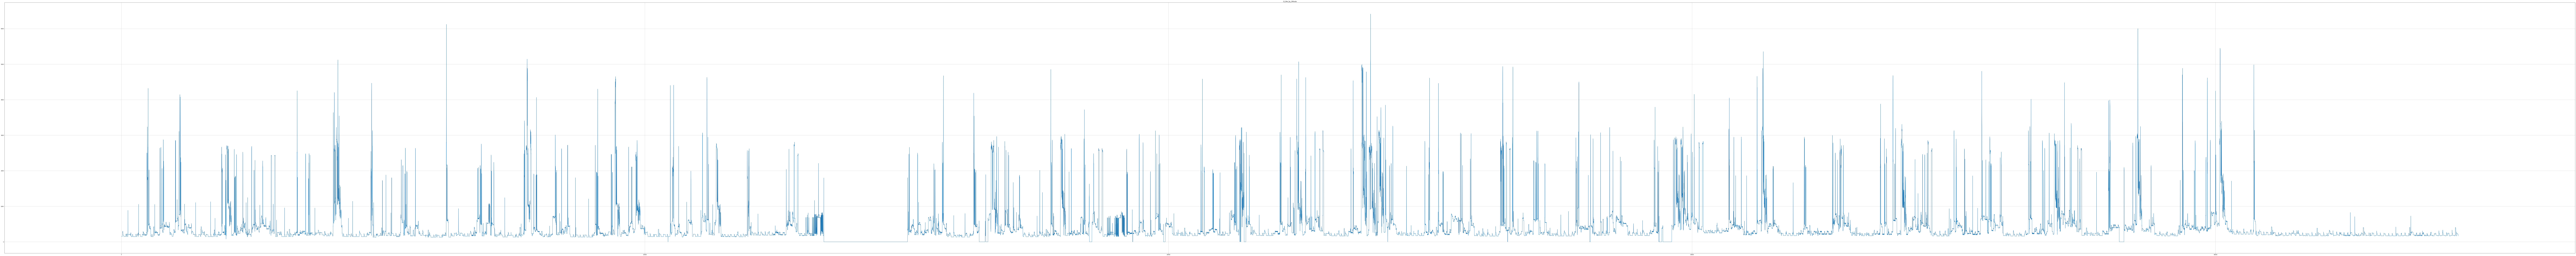

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(400,40))
plt.grid()
plt.title("13_Mar_by_1Minute")
plt.plot(range(len(Mar_13["Watt"])), Mar_13["Watt"])
plt.savefig('./13_Mar_by_1Minute.png')
plt.show()